In [249]:
import glob
import sqlite3
import pandasql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sweetviz as sv
import dtale
from statannotations.Annotator import Annotator
from itertools import combinations
import matplotlib.font_manager

In [250]:
df = pd.read_csv('data/community_dataset.csv')

distance_to_vasculature — расстояние до ближайших сосудов;

distance_to_largest_cell — расстояние до ближайшей крупной клетки;

immune_marker_1 — экспрессия иммунного маркера 1 в данной клетке;

immune_marker_2 — экспрессия иммунного маркера 2 в данной клетке;

cell_interaction - микроокружение;

cell_type — тип клетки;

area_of_cell — размер клетки;

case_id — уникальный ID пациента.


In [251]:
df.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


    1 вопрос. Есть ли стат-значимость между типом клетки и:
В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.



In [252]:
df['cell_type'] = df['cell_type'].astype('category')
df['cell_interaction'] = df['cell_interaction'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   distance_to_vasculature   269442 non-null  float64 
 1   distance_to_largest_cell  269442 non-null  float64 
 2   immune_marker_1           269442 non-null  float64 
 3   immune_marker_2           269442 non-null  float64 
 4   cell_interaction          269442 non-null  category
 5   cell_type                 269442 non-null  category
 6   case_id                   269442 non-null  int64   
 7   area_of_cell              269442 non-null  int64   
 8   age_group                 269442 non-null  category
dtypes: category(3), float64(4), int64(2)
memory usage: 13.1 MB


In [253]:
df['cell_type'].nunique()

8

In [254]:
df.groupby(['cell_type', 'age_group'])['area_of_cell'].describe()

count         mean          std    min     25%  \
cell_type     age_group                                                        
Blood cells   elder_group     521.0   328.142035   134.964251   79.0  218.00   
              young_group    2297.0   326.284284   123.729884   72.0  237.00   
Bone cells    elder_group     391.0   308.521739   114.840152  107.0  224.00   
              young_group    2164.0   290.379852   104.941002   90.0  217.00   
Immune type 1 elder_group    1583.0   255.677827   103.619068   63.0  185.00   
              young_group    3992.0   244.812876    94.409429   63.0  181.00   
Immune type 2 elder_group    7557.0   227.658330    69.374779   59.0  175.00   
              young_group    8647.0   221.531167    75.839323   65.0  163.00   
Largest cells elder_group     879.0   613.687144   806.572420   79.0  188.00   
              young_group    1109.0  1460.441839  1234.883968   62.0  329.00   
Stroma cells  elder_group   45784.0   244.781365    94.682794   57.0  179.00   
              young_group  127408.0   254.555703    93.795775   52.0  188.00   
Unclassified  elder_group   23735.0   225.895344    89.405947   59.0  169.00   
              young_group   43231.0   235.383336   102.661999   45.0  168.00   
Vasculature   elder_group      92.0   244.684783   108.452038   96.0  174.75   
              young_group      52.0   231.173077    77.100322  125.0  175.00   

                              50%      75%     max  
cell_type     age_group                             
Blood cells   elder_group   304.0   405.00   766.0  
              young_group   313.0   393.00   782.0  
Bone cells    elder_group   293.0   366.50   762.0  
              young_group   276.0   340.00   803.0  
Immune type 1 elder_group   240.0   303.00  1005.0  
              young_group   229.0   289.00  1052.0  
Immune type 2 elder_group   220.0   275.00   439.0  
              young_group   206.0   271.00   441.0  
Largest cells elder_group   263.0   576.00  6807.0  
              young_group  1099.0  2320.00  6311.0  
Stroma cells  elder_group   229.0   292.00  1035.0  
              young_group   240.0   303.00  1055.0  
Unclassified  elder_group   210.0   264.00  2371.0  
              young_group   214.0   278.00  3200.0  
Vasculature   elder_group   217.0   292.75   674.0  
              young_group   210.0   269.50   487.0

In [255]:
cell_type_group = pd.pivot_table(
    data=df,
    index=['cell_type','age_group'],
    values=['area_of_cell']
)

cell_type_group.head()

area_of_cell
cell_type     age_group                
Blood cells   elder_group    328.142035
              young_group    326.284284
Bone cells    elder_group    308.521739
              young_group    290.379852
Immune type 1 elder_group    255.677827

In [256]:
report = dtale.show(df)
report

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\views.py:746: FutureWarning:

['cell_interaction', 'cell_type', 'age_group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



По развеlовательному анализу данных вижу, что распределение близко к лог-нормалону, теперь попробуем самстоятельно проверить

((array([-4.55878463, -4.36887615, -4.26588095, ...,  4.26588095,
          4.36887615,  4.55878463]),
  array([3.8286414 , 3.97029191, 3.98898405, ..., 8.7384149 , 8.75020786,
         8.82585367])),
 (0.37637688365056815, 5.451617570927533, 0.9859438319526949))

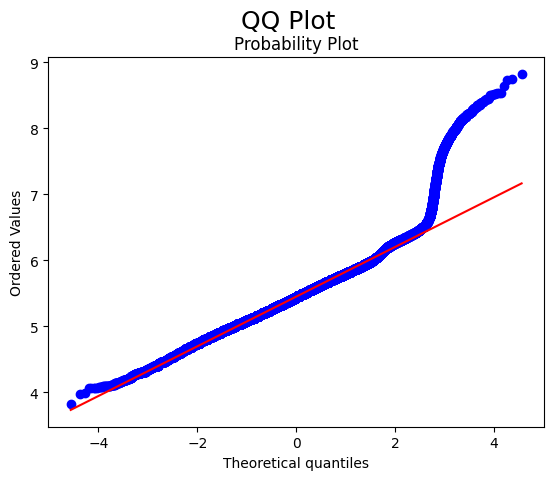

In [257]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(df['area_of_cell']), dist="norm", plot=ax1
)

In [258]:
df['cell_type'].unique()

['Stroma cells', 'Unclassified', 'Immune type 2', 'Blood cells', 'Bone cells', 'Largest cells', 'Immune type 1', 'Vasculature']
Categories (8, object): ['Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2', 'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature']

In [259]:
Stroma_cells = df[(df['cell_type']=='Stroma cells')]

In [260]:
order = ['elder_group','young_group']
pairs=list(combinations(order, 2))
x='age_group'
y='area_of_cell'

elder_group vs. young_group: t-test independent samples, P_val:4.762e-81 t=-1.908e+01


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f6687d4a30>])

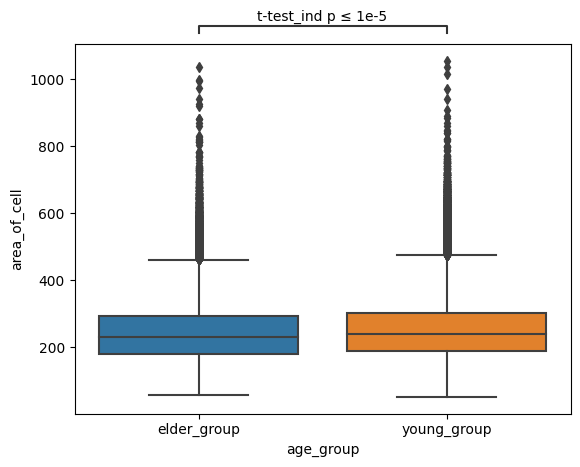

In [261]:
ax = sns.boxplot(data=Stroma_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Stroma_cells, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

In [262]:
Unclassified = df[df['cell_type']=='Unclassified']
Unclassified

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
5,812.104009,845.400332,17.557133,172.700050,community_3,Unclassified,891,196,elder_group
9,810.869444,687.209613,16.600478,210.507683,community_3,Unclassified,891,140,elder_group
10,766.624118,699.938237,22.002075,229.014747,community_3,Unclassified,891,170,elder_group
...,...,...,...,...,...,...,...,...,...
269412,933.366096,1061.980943,4.625777,13.900044,community_3,Unclassified,983,140,young_group
269425,962.382450,773.724088,10.116604,29.037607,community_5,Unclassified,983,288,young_group
269429,1186.013536,815.514952,7.690244,32.580612,community_6,Unclassified,983,166,young_group
269432,1235.761624,872.789510,10.452193,41.964221,community_4,Unclassified,983,168,young_group


elder_group vs. young_group: t-test independent samples, P_val:5.947e-33 t=-1.196e+01


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f6487c90a0>])

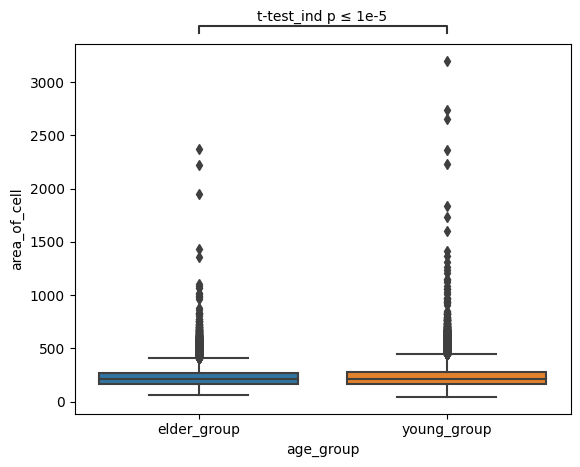

In [263]:
ax = sns.boxplot(data=Unclassified, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Unclassified, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

In [264]:
Immune_type_2 = df[df['cell_type']=='Immune type 2']
Immune_type_2.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
35,578.795873,604.065091,28.111050,117.141031,community_2,Immune type 2,891,223,elder_group
36,627.113559,636.046148,31.701647,136.872857,community_2,Immune type 2,891,214,elder_group
44,576.109024,637.306127,50.650625,350.538476,community_2,Immune type 2,891,221,elder_group
60,794.976218,603.989367,15.021383,152.144077,community_3,Immune type 2,891,281,elder_group
63,790.529070,1320.641427,14.800876,168.830195,community_1,Immune type 2,891,215,elder_group


elder_group vs. young_group: t-test independent samples, P_val:9.541e-08 t=5.338e+00


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f677f715b0>])

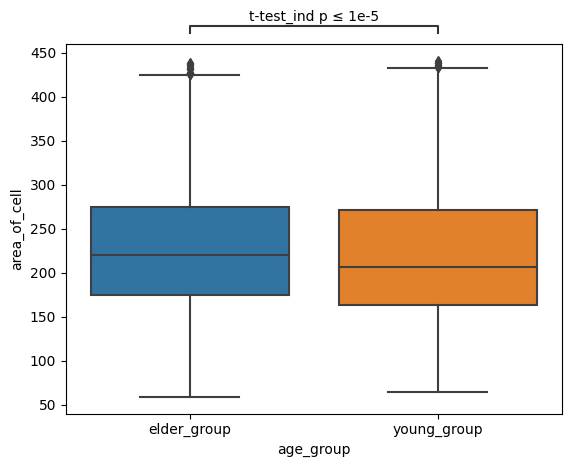

In [265]:
ax = sns.boxplot(data=Immune_type_2, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Immune_type_2, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

elder_group vs. young_group: t-test independent samples, P_val:1.671e-04 t=3.767e+00


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f64828be20>])

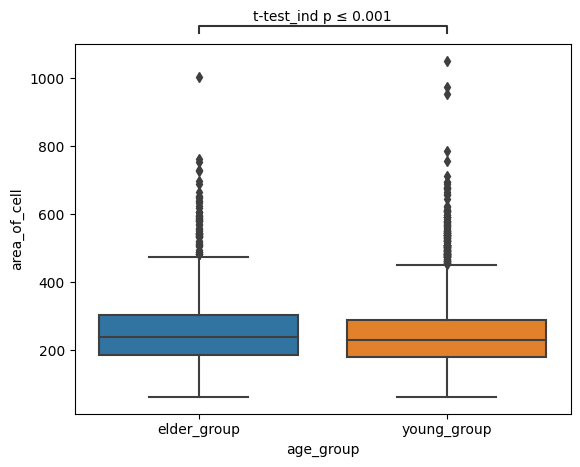

In [266]:
Immune_type_1 = df[df['cell_type']=='Immune type 1']


ax = sns.boxplot(data=Immune_type_1, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Immune_type_1, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

elder_group vs. young_group: t-test independent samples, P_val:7.611e-01 t=3.041e-01


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f648437d60>])

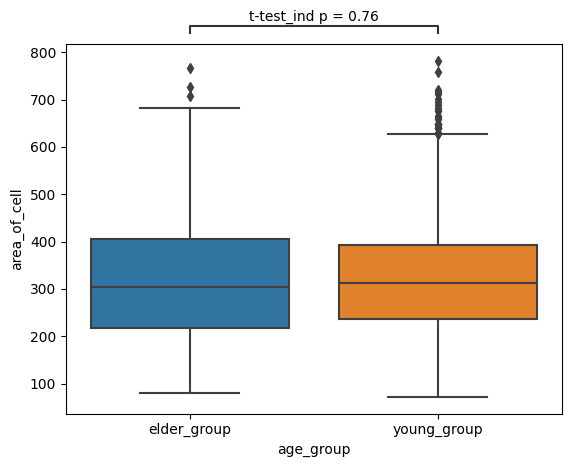

In [267]:
Blood_cells = df[df['cell_type']=='Blood cells']


ax = sns.boxplot(data=Blood_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Blood_cells, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

elder_group vs. young_group: t-test independent samples, P_val:1.959e-03 t=3.100e+00


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f64a772f10>])

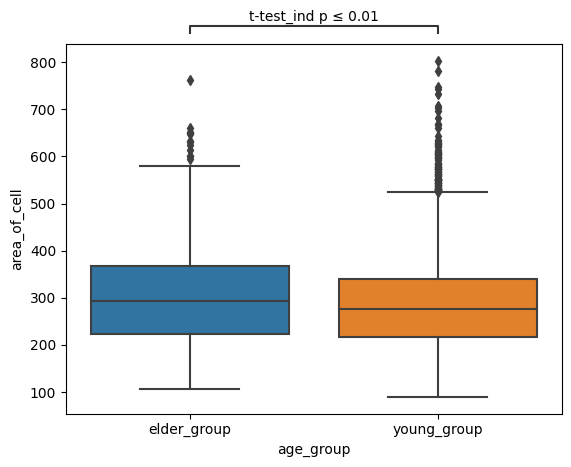

In [268]:
Bone_cells = df[df['cell_type']=='Bone cells']


ax = sns.boxplot(data=Bone_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Bone_cells, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.954e-73 U_stat=2.573e+05


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f648e0e9a0>])

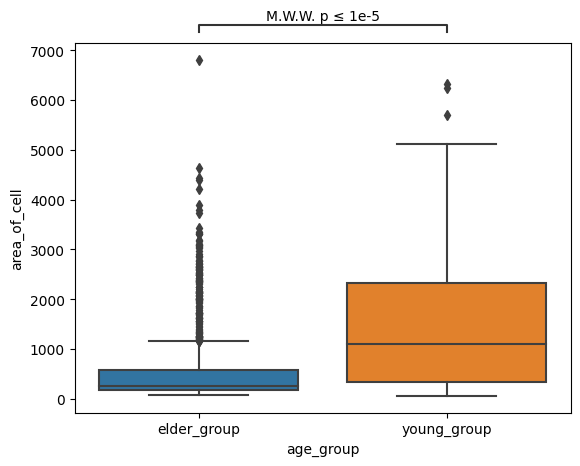

In [269]:
Largest_cells = df[df['cell_type']=='Largest cells']


ax = sns.boxplot(data=Largest_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Largest_cells, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside')
annotator.apply_and_annotate()

In [270]:
Largest_cells.groupby('age_group')['area_of_cell'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
elder_group,879.0,613.687144,806.572420,79.0,188.0,263.0,576.0,6807.0
young_group,1109.0,1460.441839,1234.883968,62.0,329.0,1099.0,2320.0,6311.0


In [271]:
Largest_cells_yong = pandasql.sqldf("""
    SELECT area_of_cell
    FROM Largest_cells
    WHERE age_group = 'young_group';""")

In [272]:
Largest_cells_elder = pandasql.sqldf("""
    SELECT area_of_cell
    FROM Largest_cells
    WHERE age_group = 'elder_group';""")

In [273]:
stats.ttest_ind(
    Largest_cells_yong['area_of_cell'], Largest_cells_elder['area_of_cell']
)

Ttest_indResult(statistic=17.573813392528738, pvalue=2.256632528952045e-64)

Два раза перепроверил, действительно разницы нет даже для больших клеток

elder_group vs. young_group: t-test independent samples, P_val:4.298e-01 t=7.919e-01


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1f648e6bd60>])

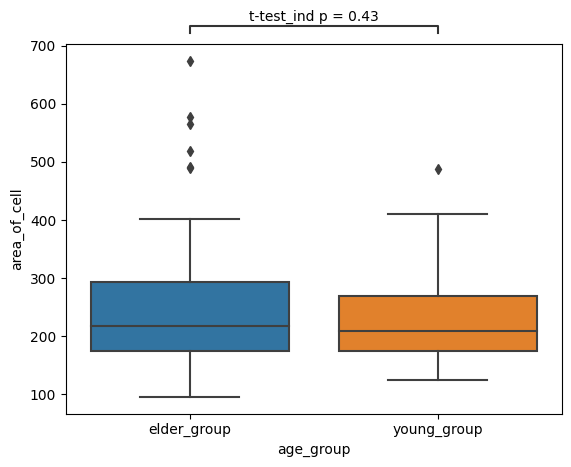

In [274]:
Vasculature = df[df['cell_type']=='Vasculature']


ax = sns.boxplot(data=Vasculature, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Vasculature, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()


Слудющий график объединяющий. Он довольно большой, но наглядный.

Bone cells_elder_group vs. Bone cells_young_group: t-test independent samples, P_val:1.959e-03 t=3.100e+00
Blood cells_elder_group vs. Blood cells_young_group: t-test independent samples, P_val:7.611e-01 t=3.041e-01
Immune type 1_elder_group vs. Immune type 1_young_group: t-test independent samples, P_val:1.671e-04 t=3.767e+00
Stroma cells_elder_group vs. Stroma cells_young_group: t-test independent samples, P_val:4.762e-81 t=-1.908e+01
Unclassified_elder_group vs. Unclassified_young_group: t-test independent samples, P_val:5.947e-33 t=-1.196e+01
Immune type 2_elder_group vs. Immune type 2_young_group: t-test independent samples, P_val:9.541e-08 t=5.338e+00
Largest cells_elder_group vs. Largest cells_young_group: t-test independent samples, P_val:2.257e-64 t=-1.757e+01
Vasculature_elder_group vs. Vasculature_young_group: t-test independent samples, P_val:4.298e-01 t=7.919e-01


(<AxesSubplot: title={'center': 'Размер клеток в зависимости от типа в разрезе возраста'}, xlabel='cell_type', ylabel='Area_of_cell'>,
  <statannotations.Annotation.Annotation at 0x1f697032df0>])

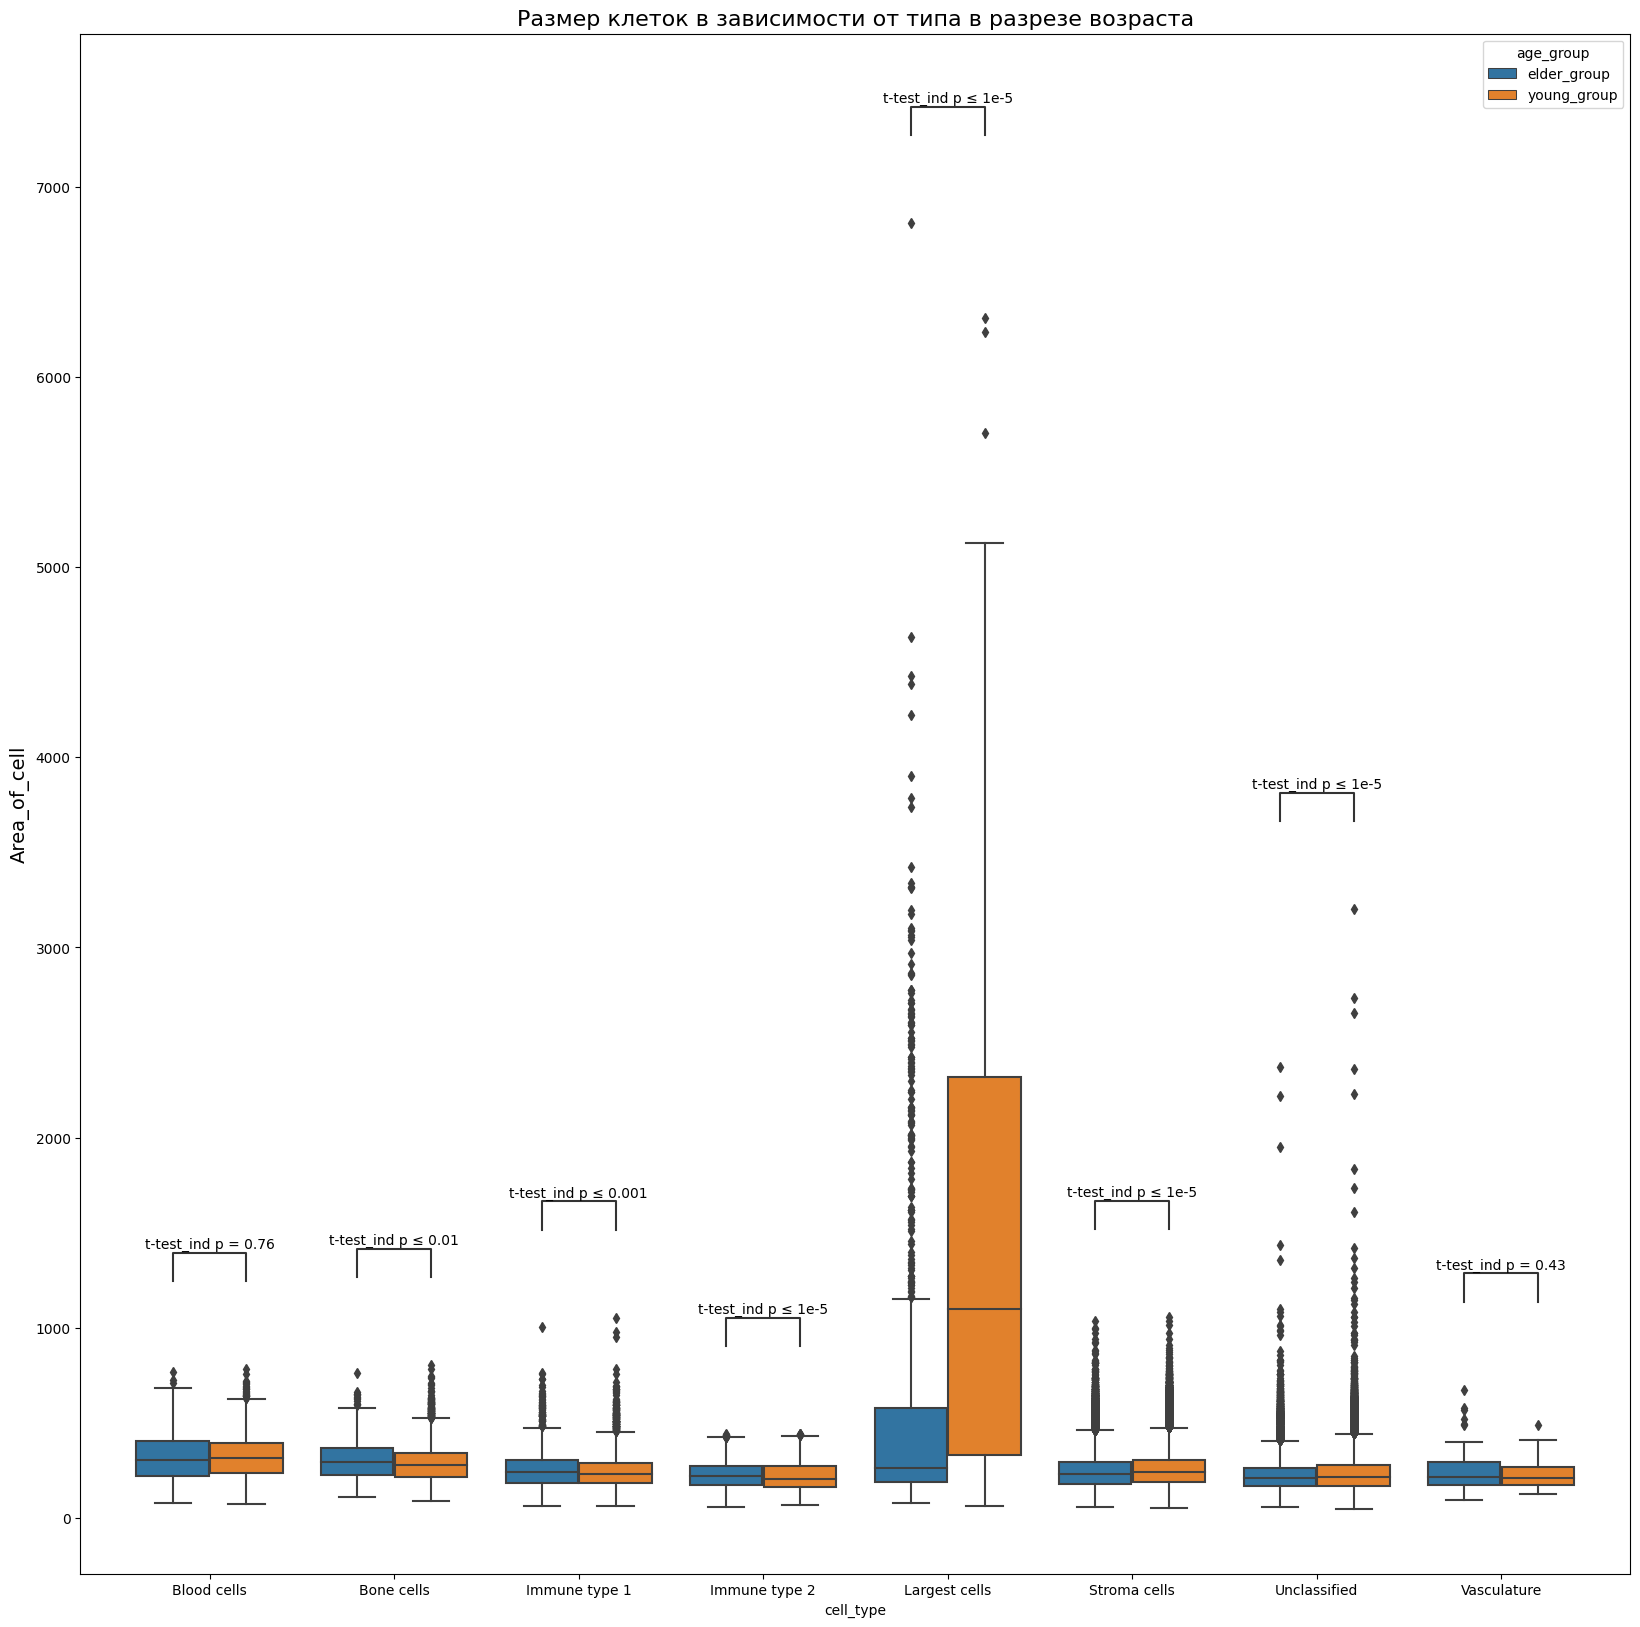

In [569]:
x='cell_type'
y = 'area_of_cell'
hue='age_group'

hue_order=['elder_group','young_group']
pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(20, 20))
cell_area = sns.boxplot(
    data=df,x='cell_type', y = 'area_of_cell',
    hue=hue, hue_order=hue_order
)
cell_area.axes.set_title(
    "Размер клеток в зависимости от типа в разрезе возраста", fontsize=16
)
cell_area.set_ylabel("Area_of_cell", fontsize=14)

annotator = Annotator(
    cell_area, pairs, data=df, x=x, y=y,
    hue_order=hue_order, hue=hue
)
annotator.configure(test='t-test_ind', text_format='simple', loc='inside')
annotator.apply_and_annotate()

Есть ли стат-значимость между типом клетки и:

б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

In [276]:
cell_immune = df.groupby(['cell_type']).agg(
    {'age_group': lambda x: list(x),
    'immune_marker_1': lambda x: list(x),
    'immune_marker_2': lambda x: list(x)}
).reset_index()

In [277]:
cell_immune = cell_immune.explode(
    ['age_group','immune_marker_1','immune_marker_2']
)

In [278]:
cell_immune['age_group'] = cell_immune['age_group'].astype('category')
cell_immune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   cell_type        269442 non-null  category
 1   age_group        269442 non-null  category
 2   immune_marker_1  269442 non-null  object  
 3   immune_marker_2  269442 non-null  object  
dtypes: category(2), object(2)
memory usage: 6.7+ MB


In [279]:
cell_immune['immune_marker_1'] = cell_immune['immune_marker_1'].astype('float16')
cell_immune['immune_marker_2'] = cell_immune['immune_marker_2'].astype('float16')
cell_immune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   cell_type        269442 non-null  category
 1   age_group        269442 non-null  category
 2   immune_marker_1  269442 non-null  float16 
 3   immune_marker_2  269442 non-null  float16 
dtypes: category(2), float16(2)
memory usage: 3.6 MB


In [280]:
cell_immune

,cell_type,age_group,immune_marker_1,immune_marker_2
0,Blood cells,elder_group,38.937500,414.750000
0,Blood cells,elder_group,18.562500,328.250000
0,Blood cells,elder_group,42.093750,347.250000
0,Blood cells,elder_group,13.156250,240.250000
0,Blood cells,elder_group,1.922852,374.750000
...,...,...,...,...
7,Vasculature,elder_group,41.000000,21.421875
7,Vasculature,elder_group,92.562500,76.250000
7,Vasculature,young_group,33.031250,28.531250
7,Vasculature,elder_group,25.234375,129.750000


In [ ]:
x='cell_type'
y = 'area_of_cell'
hue='age_group'

hue_order=['elder_group','young_group']
pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(20, 20))
cell_area = sns.boxplot(
    data=df,x='cell_type', y = 'area_of_cell',
    hue=hue, hue_order=hue_order
)
cell_area.axes.set_title(
    "Размер клеток в зависимости от типа в разрезе возраста", fontsize=16
)
cell_area.set_ylabel("Area_of_cell", fontsize=14)

annotator = Annotator(
    cell_area, pairs, data=df, x=x, y=y,
    hue_order=hue_order, hue=hue
)
annotator.configure(test='t-test_ind', text_format='simple', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_elder_group vs. Bone cells_young_group: t-test independent samples, P_val:2.374e-17 t=8.535e+00
Blood cells_elder_group vs. Blood cells_young_group: t-test independent samples, P_val:2.993e-25 t=1.048e+01
Immune type 1_elder_group vs. Immune type 1_young_group: t-test independent samples, P_val:1.121e-136 t=2.559e+01
Stroma cells_elder_group vs. Stroma cells_young_group: t-test independent samples, P_val:0.000e+00 t=1.204e+02
Unclassified_elder_group vs. Unclassified_young_group: t-test independent samples, P_val:0.000e+00 t=7.134e+01
Immune type 2_elder_group vs. Immune type 2_young_group: t-test independent samples, P_val:0.000e+00 t=7.830e+01
Largest cells_elder_group vs. Largest cells_young_group: t-test independent samples, P_val:1.559e-56 t=1.636e+01
Vasculature_elder_group vs. Vasculature_y

(<AxesSubplot: title={'center': 'Экспрессия имм.маркера_1 в зависимости от типа клеток в разрезе возраста'}, xlabel='cell_type', ylabel='Immune Marker 1'>,
  <statannotations.Annotation.Annotation at 0x1f609d92bb0>])

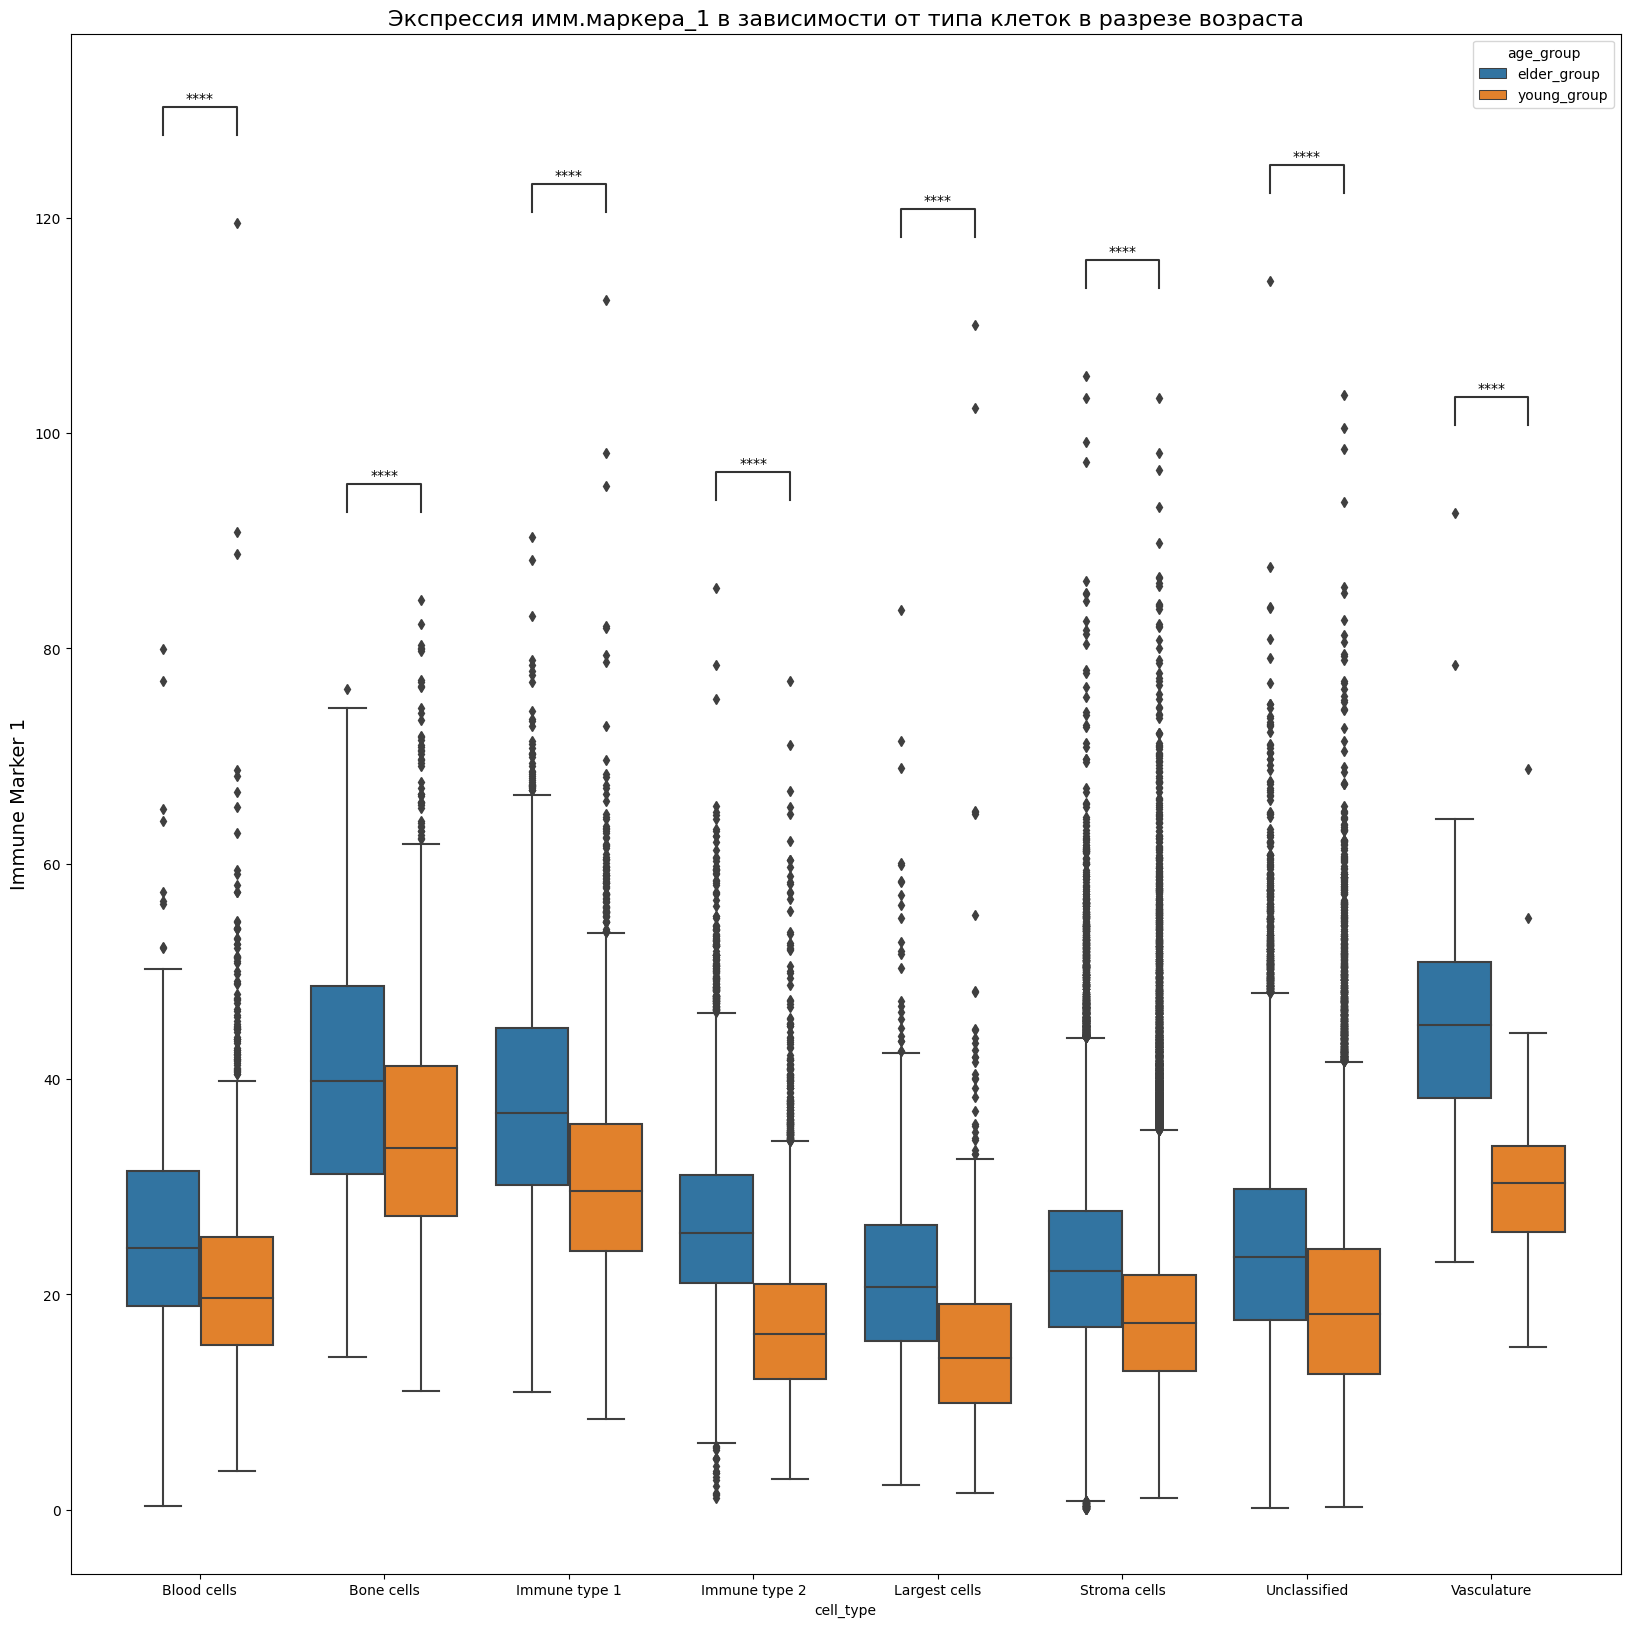

In [573]:
x='cell_type'
y = 'immune_marker_1'
hue='age_group'

hue_order=['elder_group','young_group']
pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(20, 20))
cell_immune_box = sns.boxplot(
    data=cell_immune, x='cell_type', y = 'immune_marker_1',
    hue=hue, hue_order=hue_order
)
cell_immune_box.axes.set_title(
    "Экспрессия имм.маркера_1 в зависимости от типа клеток в разрезе возраста", fontsize=16
)
cell_immune_box.set_ylabel("Immune Marker 1", fontsize=14)

annotator = Annotator(
    cell_immune_box, pairs, data=cell_immune, x=x, y=y,
    hue_order=hue_order, hue=hue
)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1238: RuntimeWarning:

overflow encountered in square



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_elder_group vs. Bone cells_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Blood cells_elder_group vs. Blood cells_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Immune type 1_elder_group vs. Immune type 1_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Stroma cells_elder_group vs. Stroma cells_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Unclassified_elder_group vs. Unclassified_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Immune type 2_elder_group vs. Immune type 2_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Largest cells_elder_group vs. Largest cells_young_group: t-test independent samples, P_val:1.000e+00 t=0.000e+00
Vasculature_elder_group vs. Vasculat

(<AxesSubplot: title={'center': 'Экспрессия имм.маркера_1 в зависимости от типа клеток в разрезе возраста'}, xlabel='cell_type', ylabel='Immune Marker 2'>,
  <statannotations.Annotation.Annotation at 0x1f6900e0b20>])

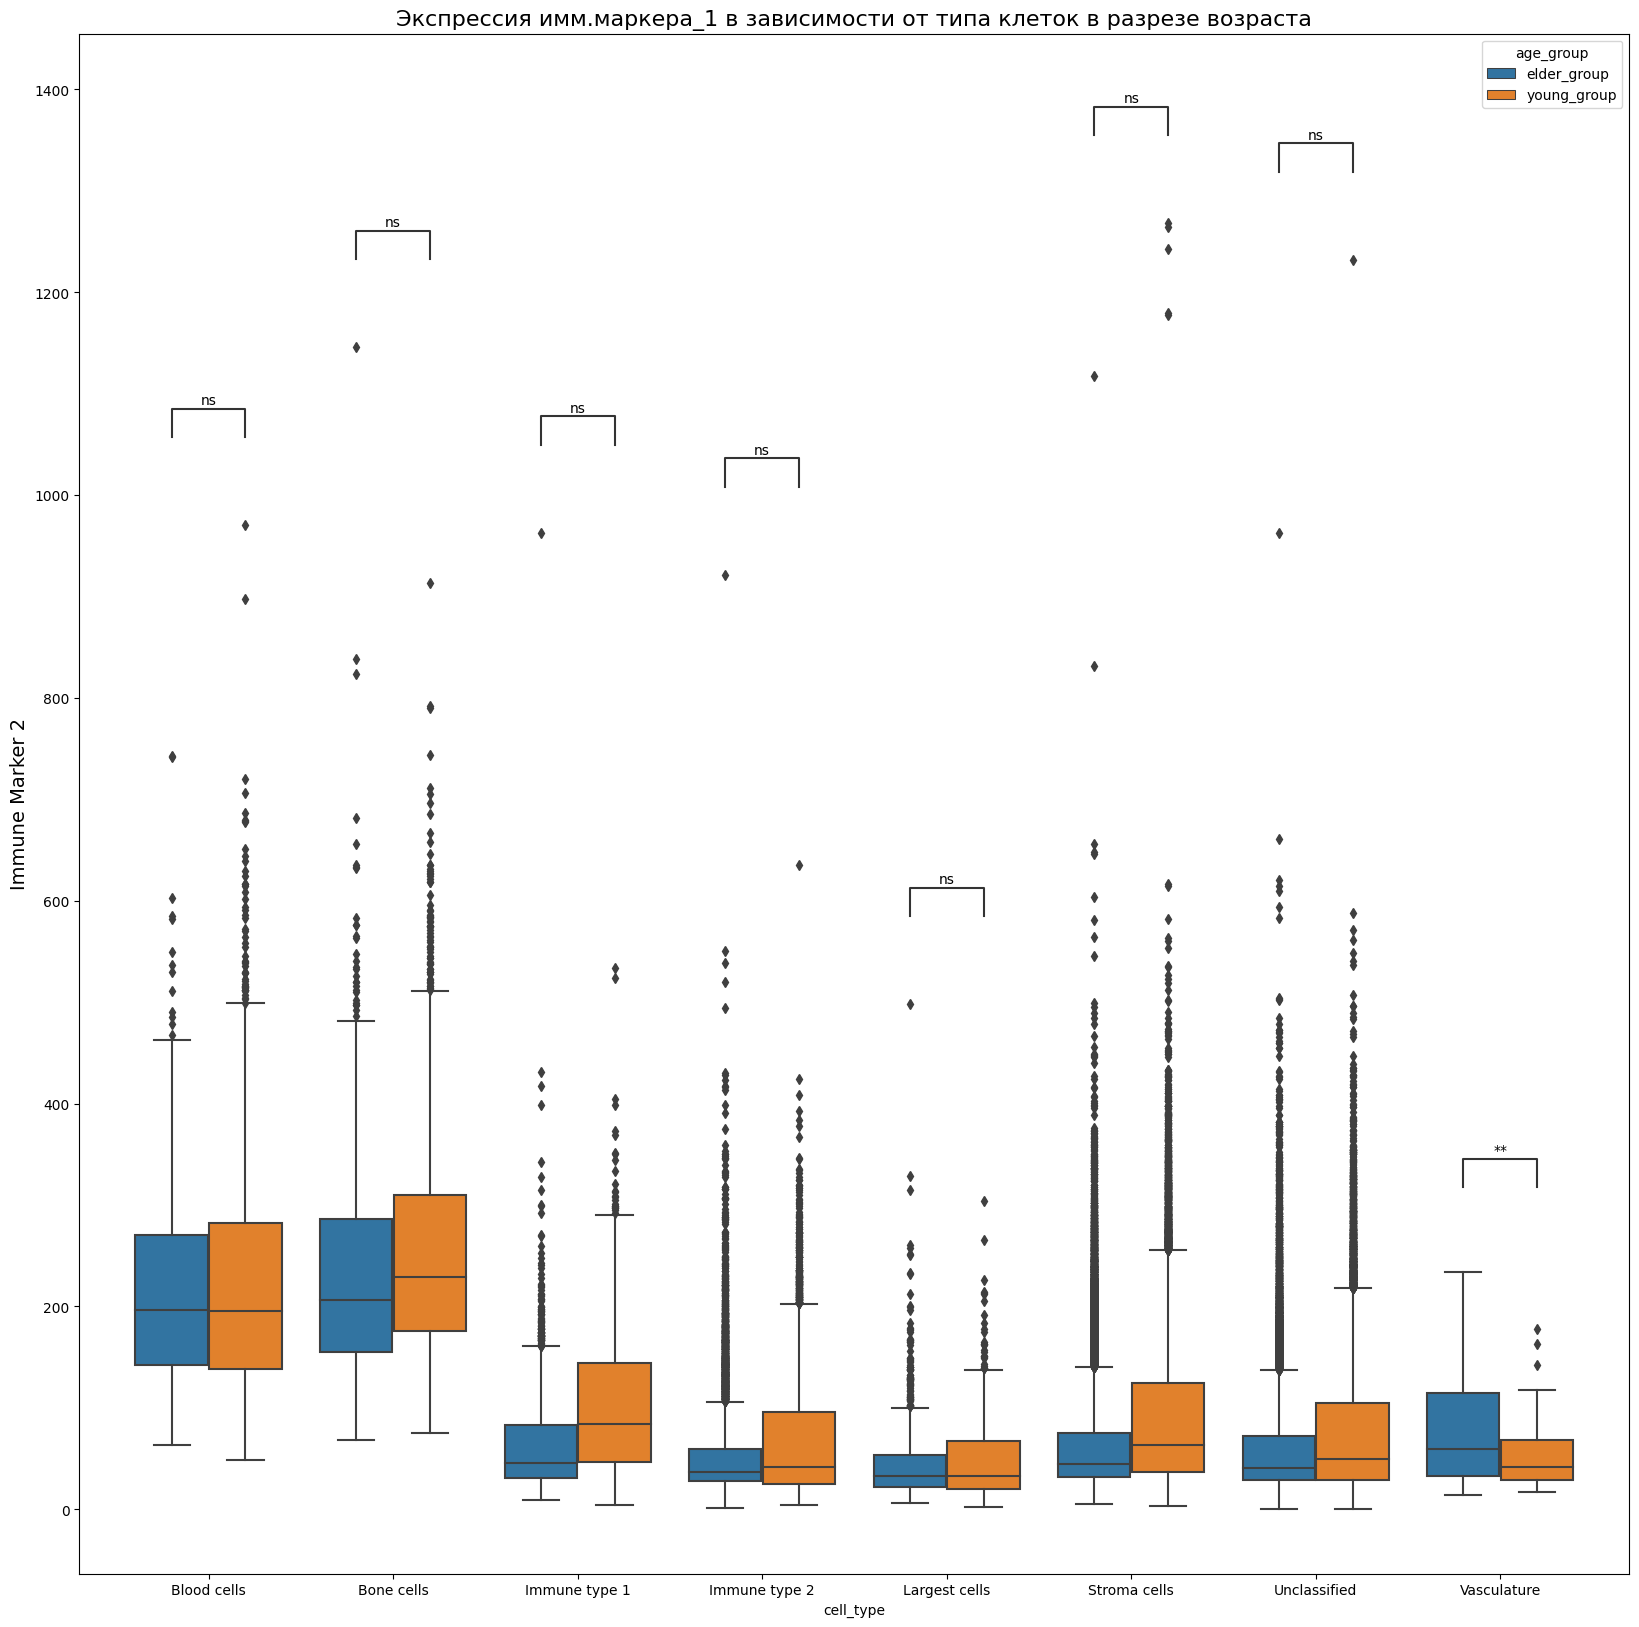

In [574]:
x='cell_type'
y = 'immune_marker_2'
hue='age_group'

hue_order=['elder_group','young_group']
pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(20, 20))
cell_immune_box = sns.boxplot(
    data=cell_immune, x='cell_type', y = 'immune_marker_2',
    hue=hue, hue_order=hue_order
)
cell_immune_box.axes.set_title(
    "Экспрессия имм.маркера_1 в зависимости от типа клеток в разрезе возраста", fontsize=16
)
cell_immune_box.set_ylabel("Immune Marker 2", fontsize=14)

annotator = Annotator(
    cell_immune_box, pairs, data=cell_immune, x=x, y=y,
    hue_order=hue_order, hue=hue
)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

In [283]:
cell_immune_blood = cell_immune[cell_immune['cell_type']=='Largest cells']
cell_immune_blood

,cell_type,age_group,immune_marker_1,immune_marker_2
4,Largest cells,elder_group,18.437500,108.687500
4,Largest cells,elder_group,30.640625,128.125000
4,Largest cells,young_group,24.640625,31.531250
4,Largest cells,young_group,19.203125,8.289062
4,Largest cells,young_group,22.734375,17.328125
...,...,...,...,...
4,Largest cells,young_group,11.851562,13.171875
4,Largest cells,young_group,16.578125,27.765625
4,Largest cells,young_group,8.710938,39.968750
4,Largest cells,young_group,4.382812,36.937500


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: t-test independent samples, P_val:1.559e-56 t=1.636e+01


(<AxesSubplot: xlabel='age_group', ylabel='immune_marker_1'>,
 [<statannotations.Annotation.Annotation at 0x1f609c90070>])

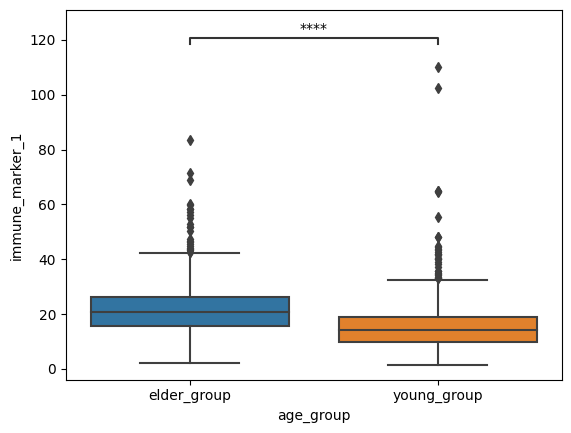

In [284]:
ax = sns.boxplot(data=cell_immune_blood, x='age_group', y = 'immune_marker_1')

order = ['elder_group','young_group']
pairs=list(combinations(order, 2))

x='age_group'
y='immune_marker_1'

annotator = Annotator(ax, pairs, data=cell_immune_blood, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

Есть ли стат-значимость между типом клетки и:

в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.

In [285]:
distance_cell = df.groupby(['cell_type']).agg(
    {'age_group': lambda x: list(x),
    'distance_to_vasculature': lambda x: list(x),
    'distance_to_largest_cell': lambda x: list(x)}
).reset_index()

In [286]:
distance_cell = distance_cell.explode(
    ['age_group','distance_to_vasculature','distance_to_largest_cell']
)

distance_cell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   cell_type                 269442 non-null  category
 1   age_group                 269442 non-null  object  
 2   distance_to_vasculature   269442 non-null  object  
 3   distance_to_largest_cell  269442 non-null  object  
dtypes: category(1), object(3)
memory usage: 8.5+ MB


In [287]:
distance_cell['age_group'] = distance_cell['age_group'].astype('category')
distance_cell['distance_to_vasculature'] = distance_cell['distance_to_vasculature'].astype('float16')
distance_cell['distance_to_largest_cell'] = distance_cell['distance_to_largest_cell'].astype('float16')

distance_cell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   cell_type                 269442 non-null  category
 1   age_group                 269442 non-null  category
 2   distance_to_vasculature   269442 non-null  float16 
 3   distance_to_largest_cell  269442 non-null  float16 
dtypes: category(2), float16(2)
memory usage: 3.6 MB


In [288]:
distance_cell.head()

,cell_type,age_group,distance_to_vasculature,distance_to_largest_cell
0,Blood cells,elder_group,774.0,676.0
0,Blood cells,elder_group,794.5,625.5
0,Blood cells,elder_group,618.5,649.5
0,Blood cells,elder_group,729.0,838.0
0,Blood cells,elder_group,770.5,687.5


In [ ]:
x='cell_type'
y = 'distance_to_vasculature'
hue='age_group'

hue_order=['elder_group','young_group']
pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(20, 20))
distance_cell_box = sns.boxplot(
    data=distance_cell, x='cell_type', y = 'distance_to_vasculature',
    hue=hue, hue_order=hue_order
)
distance_cell_box.axes.set_title(
    "Расстояние до сосудов от типа клеток в разрезе возраста", fontsize=16
)
distance_cell_box.set_ylabel("Distance to vasculature", fontsize=14)

annotator = Annotator(
    distance_cell_box, pairs, data=distance_cell, x=x, y=y,
    hue=hue, hue_order=hue_order
)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1238: RuntimeWarning:

overflow encountered in square

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\statannotations\stats\StatTest.py:77: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_elder_group vs. Bone cells_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Blood cells_elder_group vs. Blood cells_young_group: t-test independent samples, P_val:1.000e+00 t=0.000e+00
Immune type 1_elder_group vs. Immune type 1_young_group: t-test independent samples, P_val:1.000e+00 t=0.000e+00
Stroma cells_elder_group vs. Stroma cells_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Unclassified_elder_group vs. Unclassified_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Immune type 2_elder_group vs. Immune type 2_young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00
Largest cells_elder_group vs. Largest cells_young_group: t-test independent samples, P_val:1.000e+00 t=0.000e+00
Vasculature_elder_group vs. Vasculatur

(<AxesSubplot: title={'center': 'Расстояние до сосудов от типа клеток в разрезе возраста'}, xlabel='cell_type', ylabel='distance_to_largest_cell'>,
  <statannotations.Annotation.Annotation at 0x1f692bec7f0>])

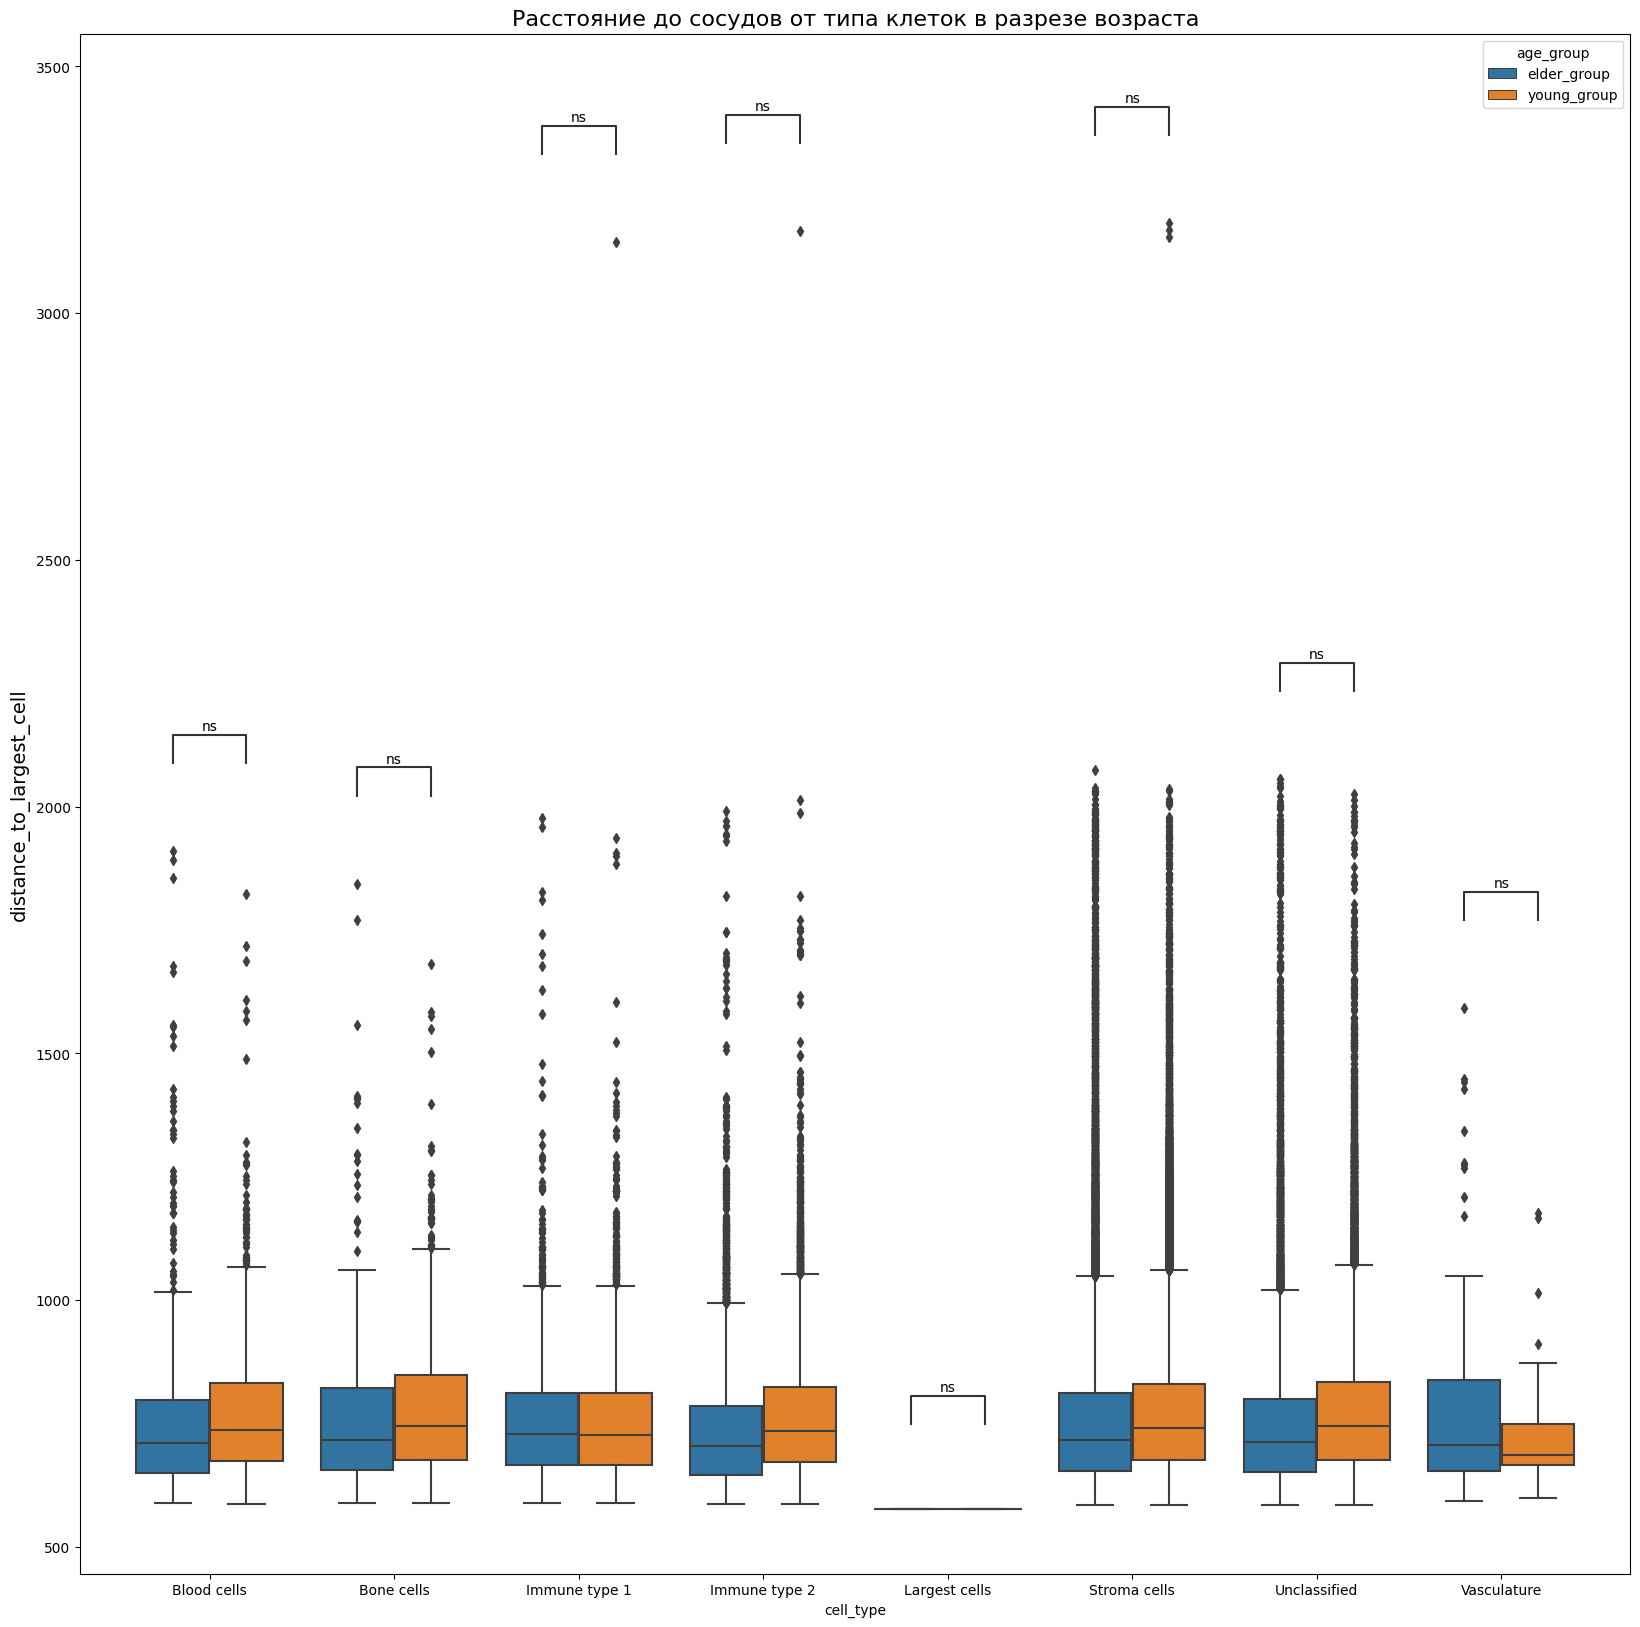

In [576]:
x='cell_type'
y = 'distance_to_largest_cell'
hue='age_group'

hue_order=['elder_group','young_group']
pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(20, 20))
distance_cell_box = sns.boxplot(
    data=distance_cell, x='cell_type', y = 'distance_to_largest_cell',
    hue=hue, hue_order=hue_order
)
distance_cell_box.axes.set_title(
    "Расстояние до сосудов от типа клеток в разрезе возраста", fontsize=16
)
distance_cell_box.set_ylabel("distance_to_largest_cell", fontsize=14)

annotator = Annotator(
    distance_cell_box, pairs, data=distance_cell, x=x, y=y,
    hue=hue, hue_order=hue_order
)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

In [291]:
p = distance_cell[distance_cell['cell_type']=='Blood cells']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: t-test independent samples, P_val:1.000e+00 t=-0.000e+00


c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1238: RuntimeWarning:

overflow encountered in square



(<AxesSubplot: xlabel='age_group', ylabel='distance_to_vasculature'>,
 [<statannotations.Annotation.Annotation at 0x1f6083d21f0>])

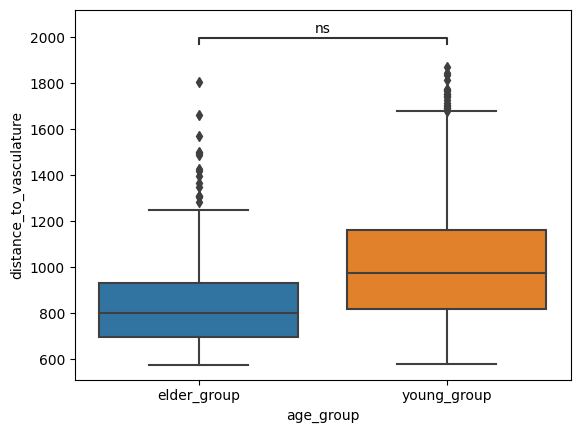

In [292]:
ax = sns.boxplot(data=p, x='age_group', y='distance_to_vasculature')

order = ['elder_group','young_group']
pairs=list(combinations(order, 2))
x='age_group'
y='distance_to_vasculature'

annotator = Annotator(ax, pairs, data=p, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

    2 Вопрос.В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток,

по Оу — их количество.

Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [607]:
community = pd.pivot_table(df, 
                index=['cell_interaction','case_id'],
                columns='cell_type',
                values='age_group',
                aggfunc=len
                ).fillna(0).reset_index()
community

cell_type,cell_interaction,case_id,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,community_1,40,37.0,27.0,27.0,1343.0,67.0,5522.0,396.0,2.0
1,community_1,199,155.0,37.0,39.0,898.0,48.0,6490.0,651.0,0.0
2,community_1,559,42.0,29.0,11.0,56.0,11.0,1401.0,117.0,3.0
3,community_1,566,9.0,15.0,4.0,187.0,11.0,975.0,85.0,1.0
4,community_1,693,351.0,799.0,306.0,1025.0,103.0,9576.0,1350.0,3.0
5,community_1,708,53.0,59.0,34.0,683.0,76.0,4867.0,450.0,7.0
6,community_1,891,20.0,8.0,4.0,145.0,5.0,816.0,44.0,2.0
7,community_1,983,143.0,154.0,156.0,648.0,50.0,6972.0,911.0,0.0
8,community_2,40,40.0,10.0,130.0,420.0,22.0,4994.0,2116.0,2.0
9,community_2,199,96.0,11.0,204.0,364.0,6.0,6248.0,3601.0,0.0


In [294]:
cell_types = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]

In [295]:
community_melt = pd.melt(
    community, value_vars=cell_types, var_name='cell_type',
    value_name='cell_number', id_vars=['cell_interaction','case_id']
)

In [296]:
community_melt

,cell_interaction,case_id,cell_type,cell_number
0,community_1,40,Blood cells,37.0
1,community_1,199,Blood cells,155.0
2,community_1,559,Blood cells,42.0
3,community_1,566,Blood cells,9.0
4,community_1,693,Blood cells,351.0
...,...,...,...,...
379,community_6,566,Vasculature,1.0
380,community_6,693,Vasculature,0.0
381,community_6,708,Vasculature,1.0
382,community_6,891,Vasculature,2.0


                                            !!!!!!!!

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells_community_1 vs. Stroma cells_community_2: t-test independent samples, P_val:5.206e-01 t=6.590e-01
Unclassified_community_1 vs. Unclassified_community_2: t-test independent samples, P_val:1.870e-02 t=-2.659e+00
Vasculature_community_1 vs. Vasculature_community_2: t-test independent samples, P_val:8.087e-01 t=-2.467e-01
Immune type 2_community_1 vs. Immune type 2_community_2: t-test independent samples, P_val:3.241e-02 t=2.374e+00
Bone cells_community_1 vs. Bone cells_community_2: t-test independent samples, P_val:2.327e-01 t=1.247e+00
Largest cells_community_1 vs. Largest cells_community_2: t-test independent samples, P_val:1.194e-02 t=2.887e+00
Immune type 1_community_1 vs. Immune type 1_community_2: t-test independent samples, P_val:2.145e-01 t=-1.300e+00
Blood cells_community_1 vs. Blood cells

(<AxesSubplot: title={'center': 'Количество разных типов клеток по микроокружениям, независимо от пациента'}, xlabel='cell_type', ylabel='Cell Number'>,
  <statannotations.Annotation.Annotation at 0x1f6a2a1b9a0>])

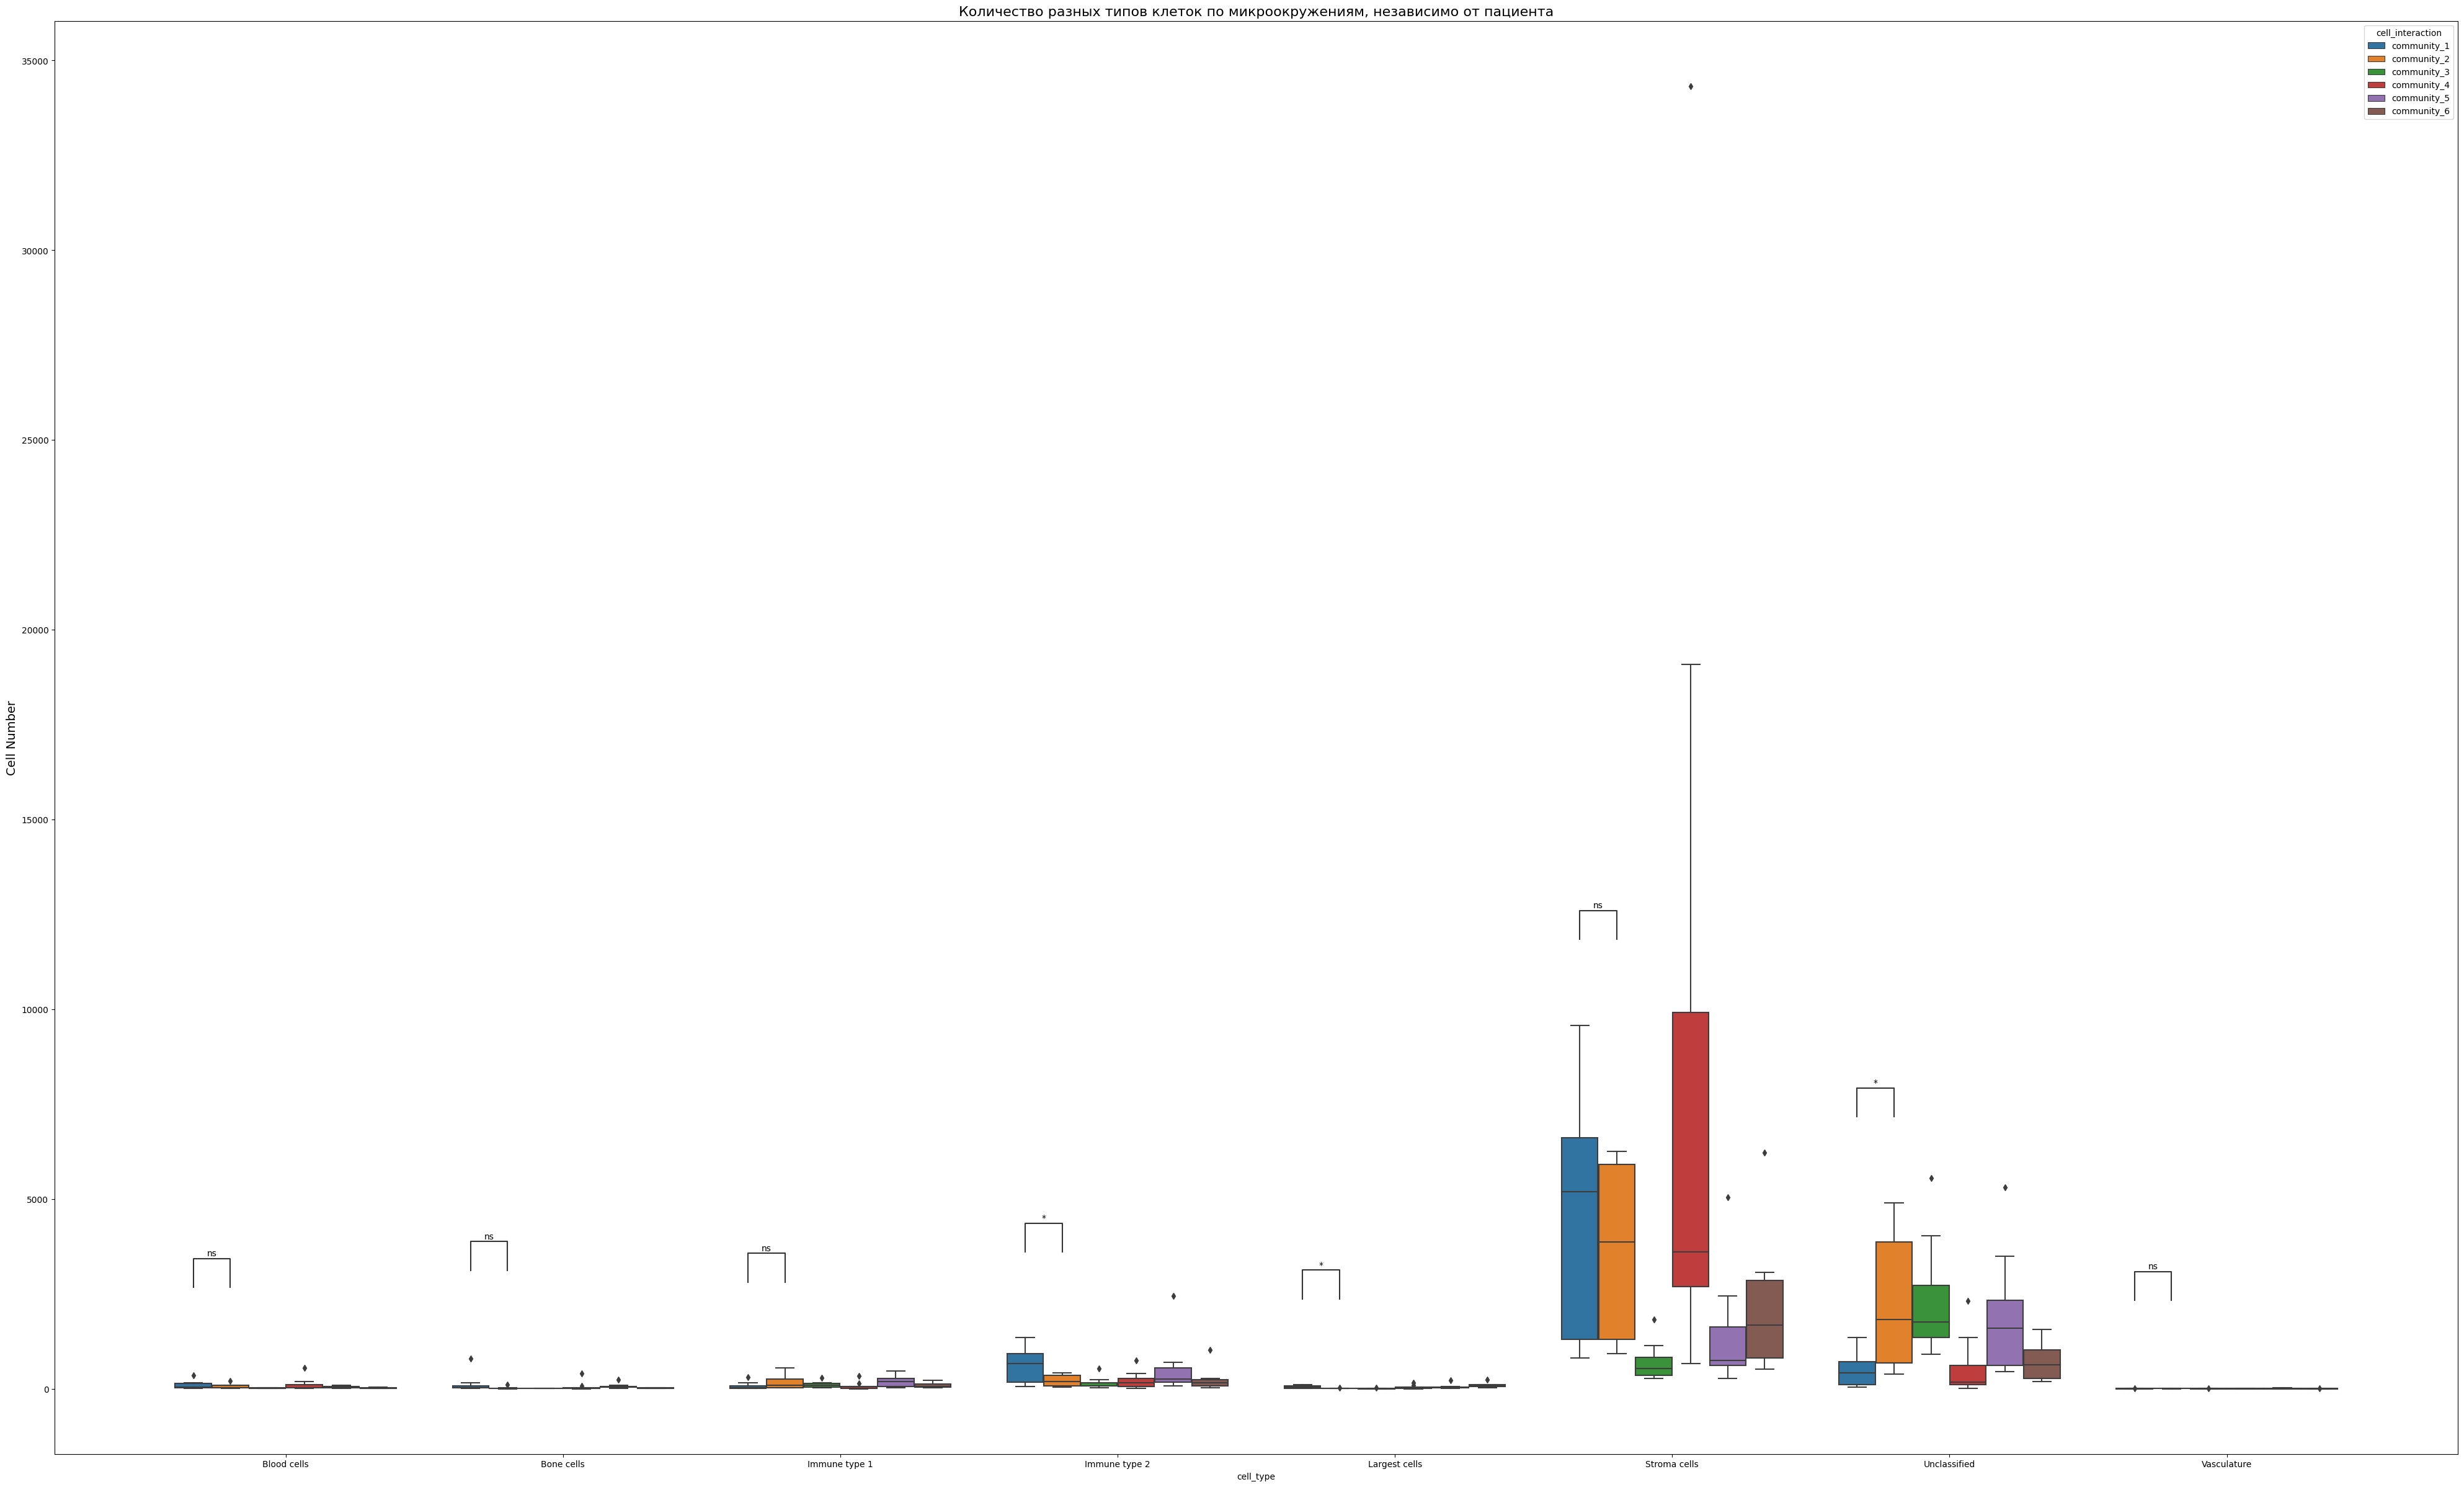

In [604]:
x = 'cell_type'
y = 'cell_number'
hue = 'cell_interaction'

hue_order=['community_1','community_2','community_3','community_4','community_5','community_6']
pairs = [(((i,'community_1'),(i,'community_2')))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(50, 30))
community_type = sns.boxplot(
    data=community_melt, x='cell_type', y ='cell_number',
    hue=hue, hue_order=hue_order
)
community_type.axes.set_title(
    "Количество разных типов клеток по микроокружениям, независимо от пациента",
    fontsize=16
)
community_type.set_ylabel("Cell Number", fontsize=14)

annotator = Annotator(community_type, pairs, data=community_melt, x=x, y=y, hue=hue, hue_order=hue_order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()


Прежде всего нас интересуют не общие данные, а данные по конкретному пациенту: сравнивать будем у него есть ли стат.значимость между количеством разных клеток по микроокружению. Поэтому сравним их отдельно.

In [ ]:
x = 'cell_type'
y = 'cell_number'
hue = 'cell_interaction'

hue_order=['community_1','community_2','community_3','community_4','community_5','community_6']
pairs = [(((i,'community_1'),(i,'community_2')))
        for i in df['cell_type'].unique()
]

plt.figure(figsize=(50, 30))
community_type = sns.boxplot(
    data=community_melt, x='cell_type', y ='cell_number',
    hue=hue, hue_order=hue_order
)
community_type.axes.set_title(
    "Количество разных типов клеток по микроокружениям, независимо от пациента",
    fontsize=16
)
community_type.set_ylabel("Cell Number", fontsize=14)

annotator = Annotator(community_type, pairs, data=community_melt, x=x, y=y, hue=hue, hue_order=hue_order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

In [610]:
df['cell_type'].unique()

['Stroma cells', 'Unclassified', 'Immune type 2', 'Blood cells', 'Bone cells', 'Largest cells', 'Immune type 1', 'Vasculature']
Categories (8, object): ['Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2', 'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:9.503e-01 t=-6.394e-02
Bone cells vs. Immune type 1: t-test independent samples, P_val:1.727e-01 t=-1.468e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:3.935e-03 t=-3.726e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:8.156e-03 t=3.290e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:1.778e-02 t=-2.832e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:1.291e-01 t=1.654e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:6.626e-03 t=3.413e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:1.208e-01 t=-1.696e+00
Bone cells vs. Immune type 2: t-test independent samples, P_val:1.795e-03 t=-4.212e+00
Immune type 1 vs. Largest cells

(<AxesSubplot: title={'center': 'Пациент ID-566, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f692959040>])

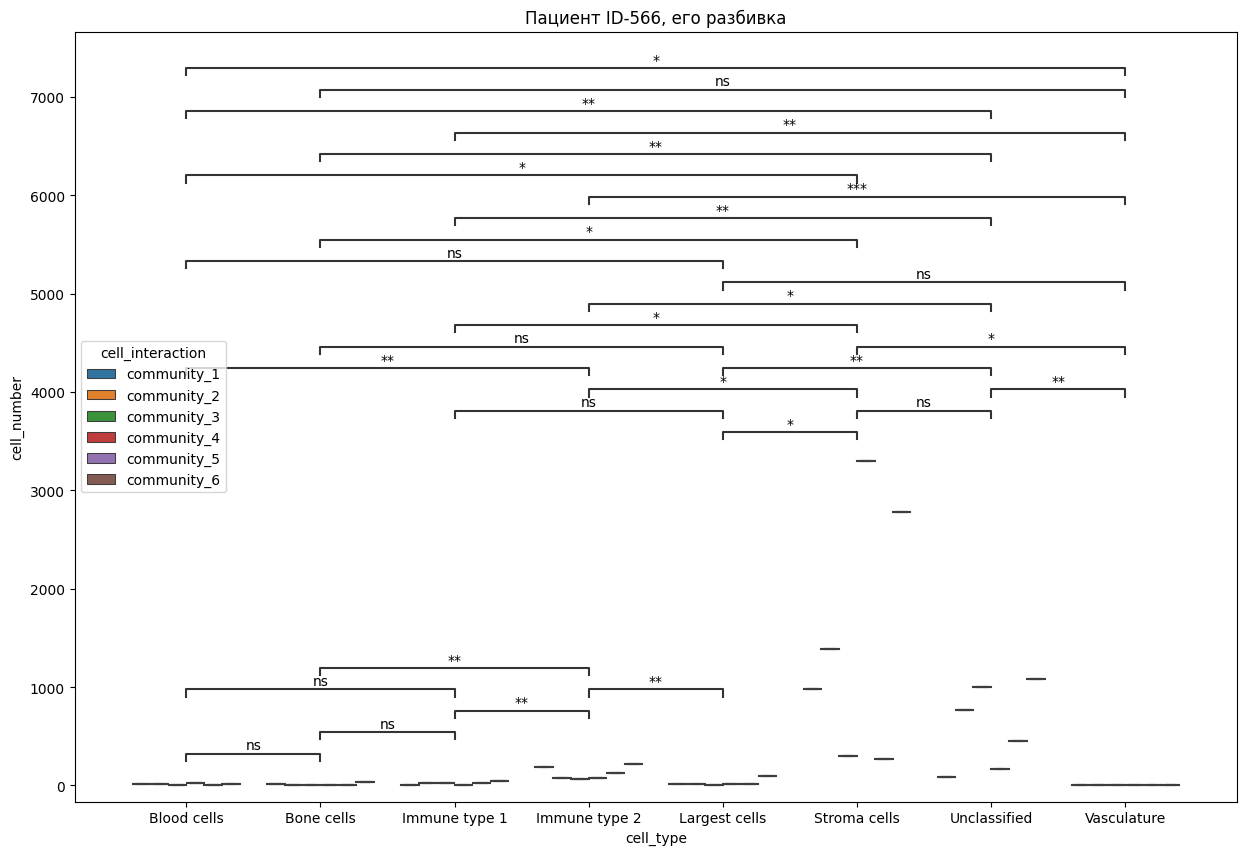

In [615]:
community_melt_id40 = community_melt[
    community_melt['case_id'] == 40
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-566, его разбивка")
ax = sns.boxplot(
    data=community_melt_id566, x='cell_type',
    y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id566, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:1.244e-02 t=3.041e+00
Bone cells vs. Immune type 1: t-test independent samples, P_val:1.327e-02 t=-3.003e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:2.663e-02 t=-2.597e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:4.984e-03 t=3.583e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:1.512e-03 t=-4.320e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:1.036e-01 t=1.791e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:9.559e-03 t=3.196e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:2.225e-01 t=-1.301e+00
Bone cells vs. Immune type 2: t-test independent samples, P_val:3.778e-03 t=-3.751e+00
Immune type 1 vs. Largest cells:

(<AxesSubplot: title={'center': 'Пациент ID-199, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f60d1f2520>])

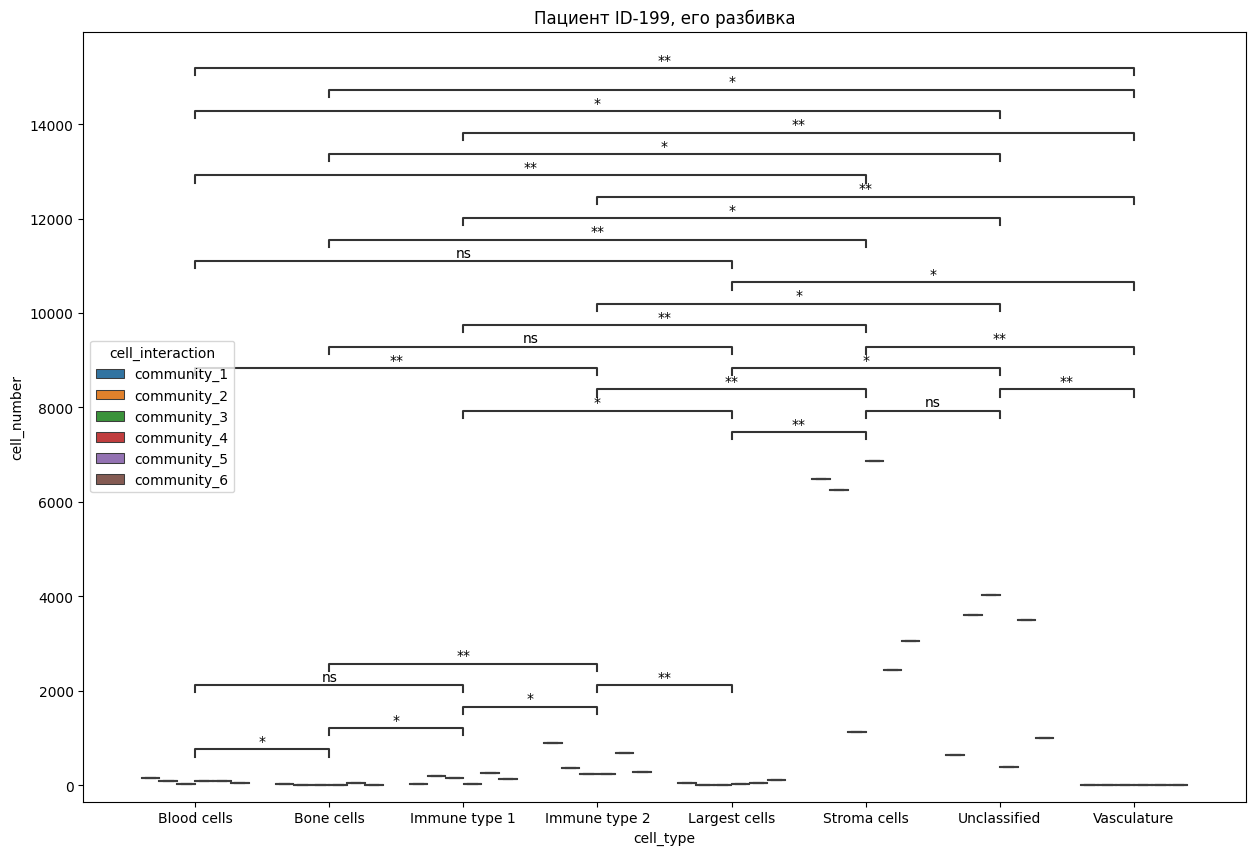

In [299]:
community_melt_id199 = community_melt[
    community_melt['case_id'] == 199
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-199, его разбивка")
ax = sns.boxplot(
    data=community_melt_id199, x='cell_type', y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id199, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:9.503e-01 t=-6.394e-02
Bone cells vs. Immune type 1: t-test independent samples, P_val:1.727e-01 t=-1.468e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:3.935e-03 t=-3.726e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:8.156e-03 t=3.290e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:1.778e-02 t=-2.832e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:1.291e-01 t=1.654e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:6.626e-03 t=3.413e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:1.208e-01 t=-1.696e+00
Bone cells vs. Immune type 2: t-test independent samples, P_val:1.795e-03 t=-4.212e+00
Immune type 1 vs. Largest cells

(<AxesSubplot: title={'center': 'Пациент ID-566, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f60d50ccd0>])

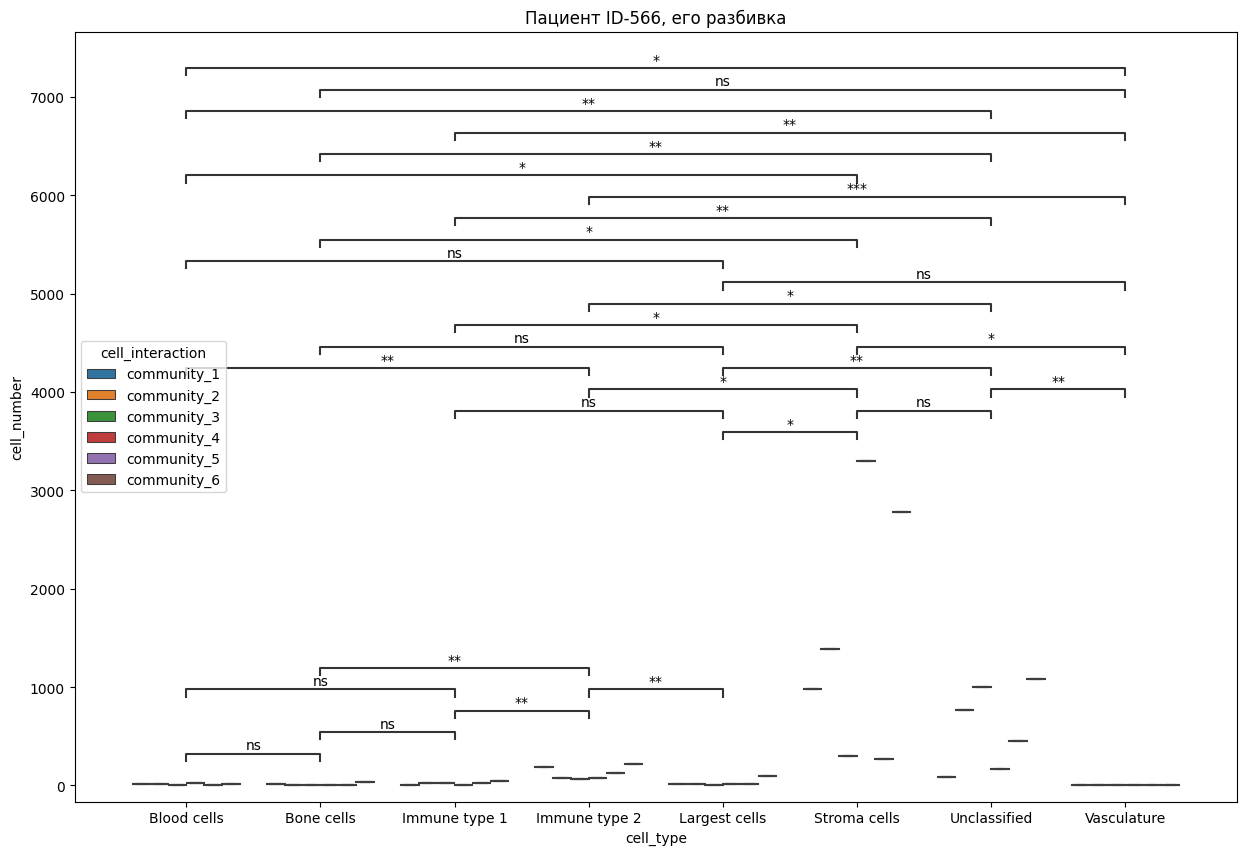

In [300]:
community_melt_id566 = community_melt[
    community_melt['case_id'] == 566
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-566, его разбивка")
ax = sns.boxplot(
    data=community_melt_id566, x='cell_type',
    y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id566, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:2.880e-01 t=1.122e+00
Bone cells vs. Immune type 1: t-test independent samples, P_val:2.517e-01 t=-1.216e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:2.721e-01 t=-1.162e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:2.387e-02 t=2.661e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:1.818e-04 t=-5.764e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:4.609e-02 t=2.276e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:2.016e-02 t=2.759e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:7.703e-01 t=-3.001e-01
Bone cells vs. Immune type 2: t-test independent samples, P_val:4.661e-02 t=-2.270e+00
Immune type 1 vs. Largest cells:

(<AxesSubplot: title={'center': 'Пациент ID-559, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f60db9a460>])

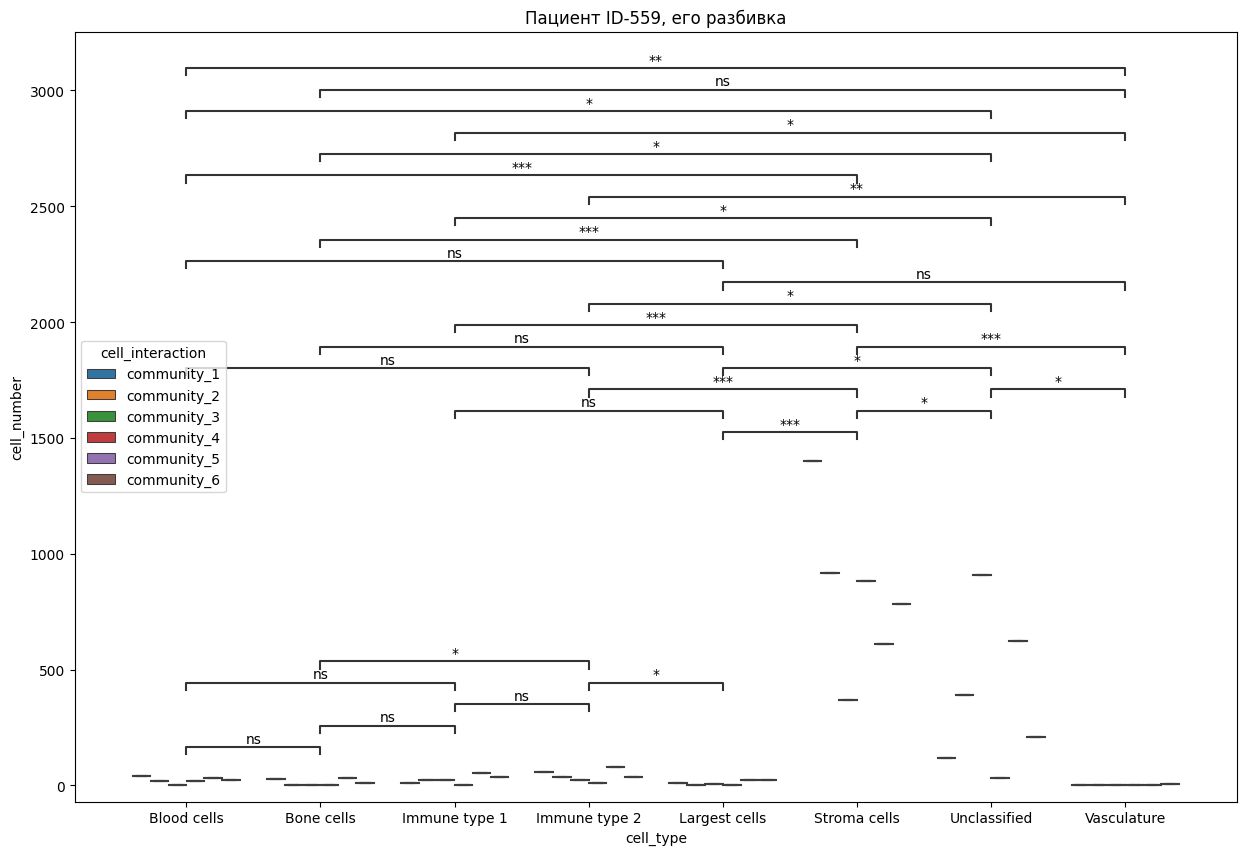

In [301]:
community_melt_id559 = community_melt[
    community_melt['case_id'] == 559
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-559, его разбивка")
ax = sns.boxplot(
    data=community_melt_id559, x='cell_type', y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id559, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:6.780e-01 t=-4.277e-01
Bone cells vs. Immune type 1: t-test independent samples, P_val:9.355e-01 t=-8.296e-02
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:4.572e-01 t=-7.733e-01
Immune type 2 vs. Largest cells: t-test independent samples, P_val:5.508e-02 t=2.171e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:1.453e-01 t=-1.579e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:2.507e-01 t=1.219e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:1.393e-02 t=2.975e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:5.124e-01 t=-6.793e-01
Bone cells vs. Immune type 2: t-test independent samples, P_val:4.839e-01 t=-7.269e-01
Immune type 1 vs. Largest cells

(<AxesSubplot: title={'center': 'Пациент ID-693, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f6890a3370>])

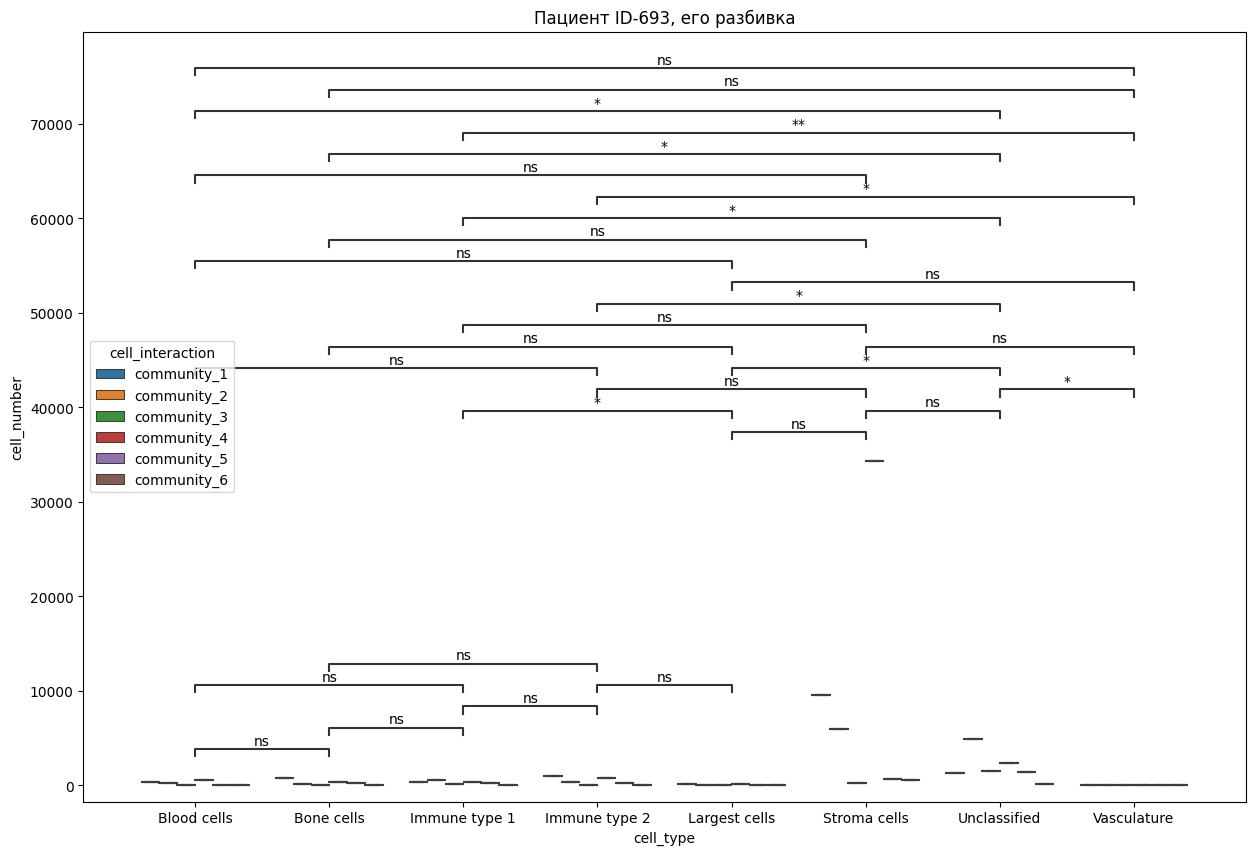

In [455]:
community_melt_id693 = community_melt[
    community_melt['case_id'] == 693
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-693, его разбивка")
ax = sns.boxplot(
    data=community_melt_id693, x='cell_type', y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id693, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:9.267e-01 t=9.429e-02
Bone cells vs. Immune type 1: t-test independent samples, P_val:7.580e-02 t=-1.981e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:6.778e-02 t=-2.048e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:4.128e-02 t=2.341e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:7.406e-03 t=-3.347e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:1.394e-01 t=1.606e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:1.417e-02 t=2.965e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:7.179e-02 t=-2.013e+00
Bone cells vs. Immune type 2: t-test independent samples, P_val:2.706e-02 t=-2.588e+00
Immune type 1 vs. Largest cells:

(<AxesSubplot: title={'center': 'Пациент ID-708, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f6181af760>])

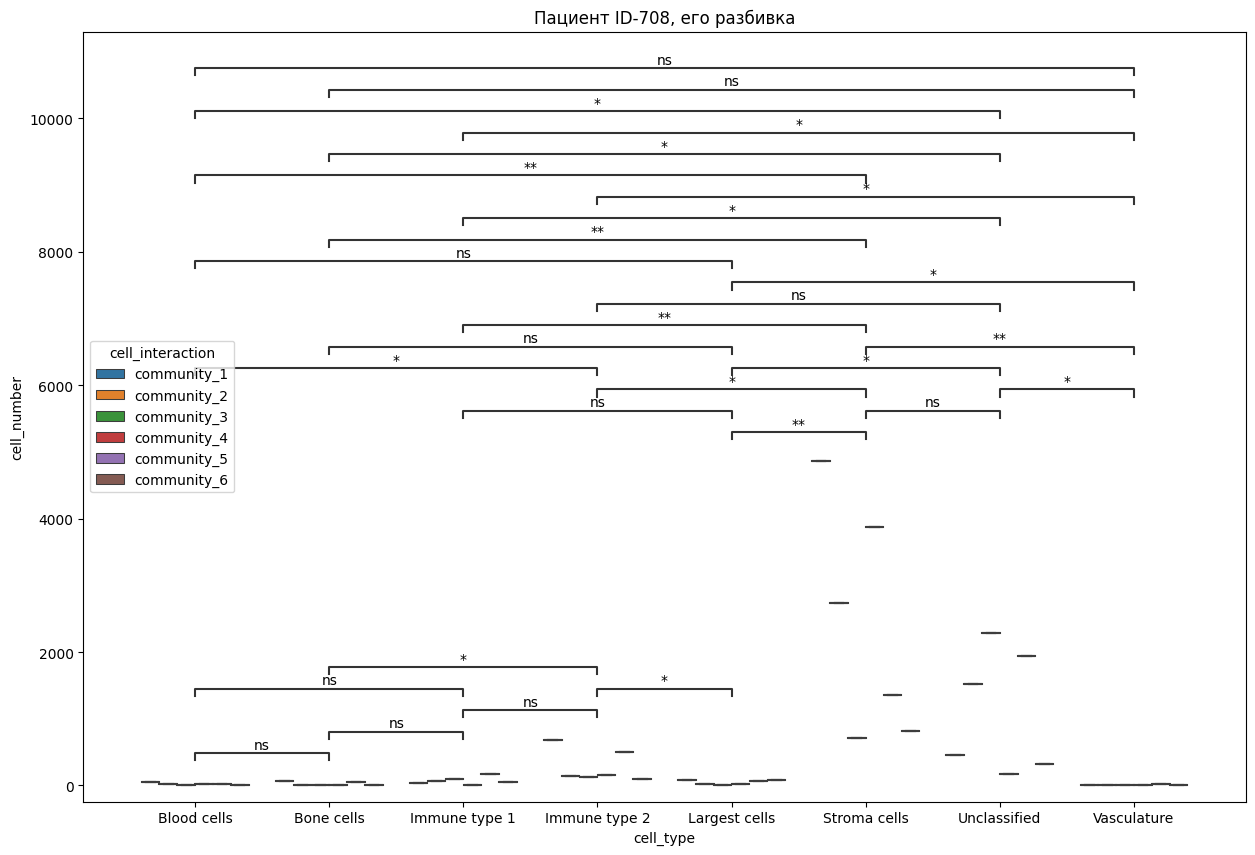

In [303]:
community_melt_id708 = community_melt[
    community_melt['case_id'] == 708
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-708, его разбивка")
ax = sns.boxplot(
    data=community_melt_id708, x='cell_type', y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id708, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:5.276e-01 t=6.545e-01
Bone cells vs. Immune type 1: t-test independent samples, P_val:1.990e-01 t=-1.376e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:3.432e-02 t=-2.449e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:1.810e-02 t=2.822e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:3.954e-06 t=-9.046e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:1.801e-01 t=1.441e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:5.703e-02 t=2.150e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:2.898e-01 t=-1.118e+00
Bone cells vs. Immune type 2: t-test independent samples, P_val:1.502e-02 t=-2.931e+00
Immune type 1 vs. Largest cells:

(<AxesSubplot: title={'center': 'Пациент ID-891, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f618bc6160>])

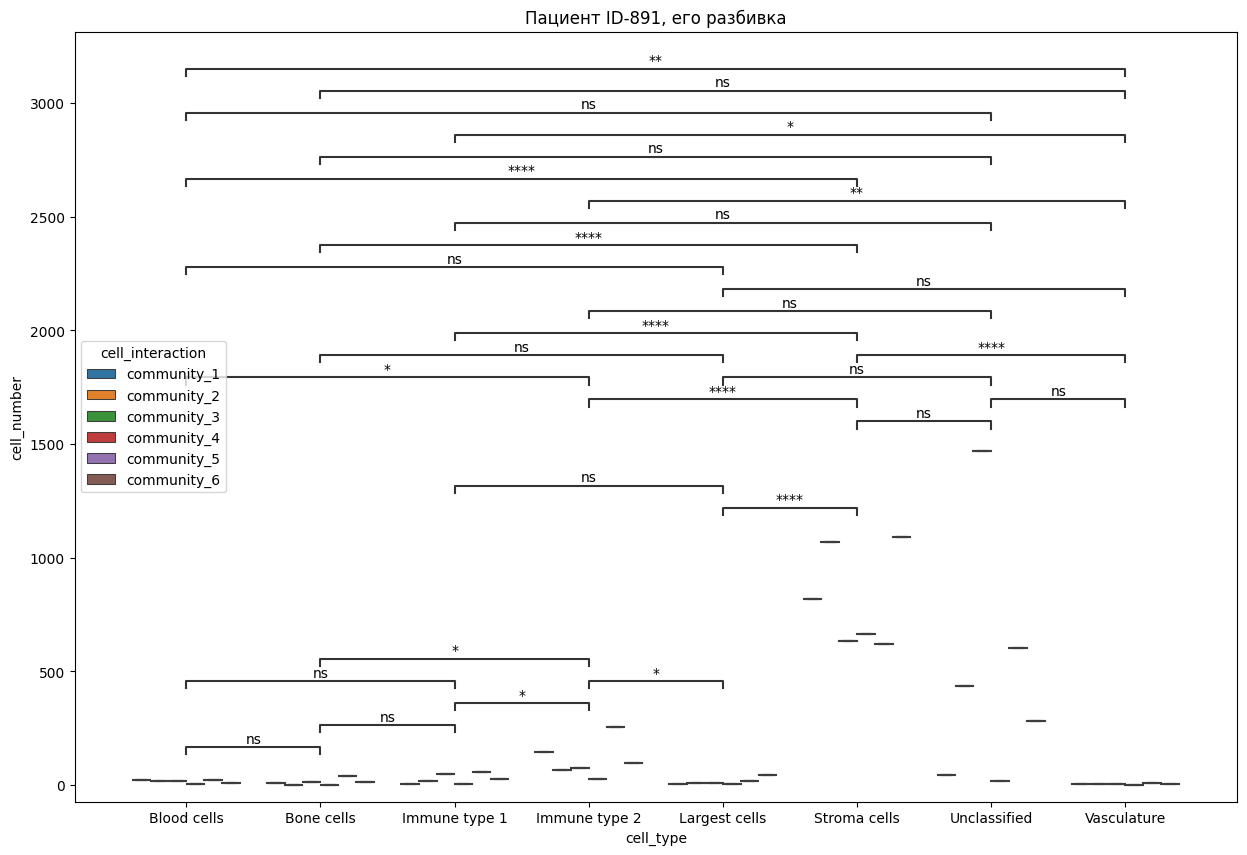

In [304]:
community_melt_id891 = community_melt[
    community_melt['case_id'] == 891
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-891, его разбивка")
ax = sns.boxplot(
    data=community_melt_id891, x='cell_type', y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id891, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: t-test independent samples, P_val:5.412e-01 t=6.325e-01
Bone cells vs. Immune type 1: t-test independent samples, P_val:2.932e-02 t=-2.541e+00
Immune type 1 vs. Immune type 2: t-test independent samples, P_val:2.458e-01 t=-1.233e+00
Immune type 2 vs. Largest cells: t-test independent samples, P_val:1.412e-02 t=2.967e+00
Largest cells vs. Stroma cells: t-test independent samples, P_val:6.641e-02 t=-2.060e+00
Stroma cells vs. Unclassified: t-test independent samples, P_val:2.023e-01 t=1.364e+00
Unclassified vs. Vasculature: t-test independent samples, P_val:7.218e-03 t=3.362e+00
Blood cells vs. Immune type 1: t-test independent samples, P_val:8.859e-02 t=-1.886e+00
Bone cells vs. Immune type 2: t-test independent samples, P_val:1.811e-02 t=-2.821e+00
Immune type 1 vs. Largest cells:

(<AxesSubplot: title={'center': 'Пациент ID-983, его разбивка'}, xlabel='cell_type', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f619e7fb50>])

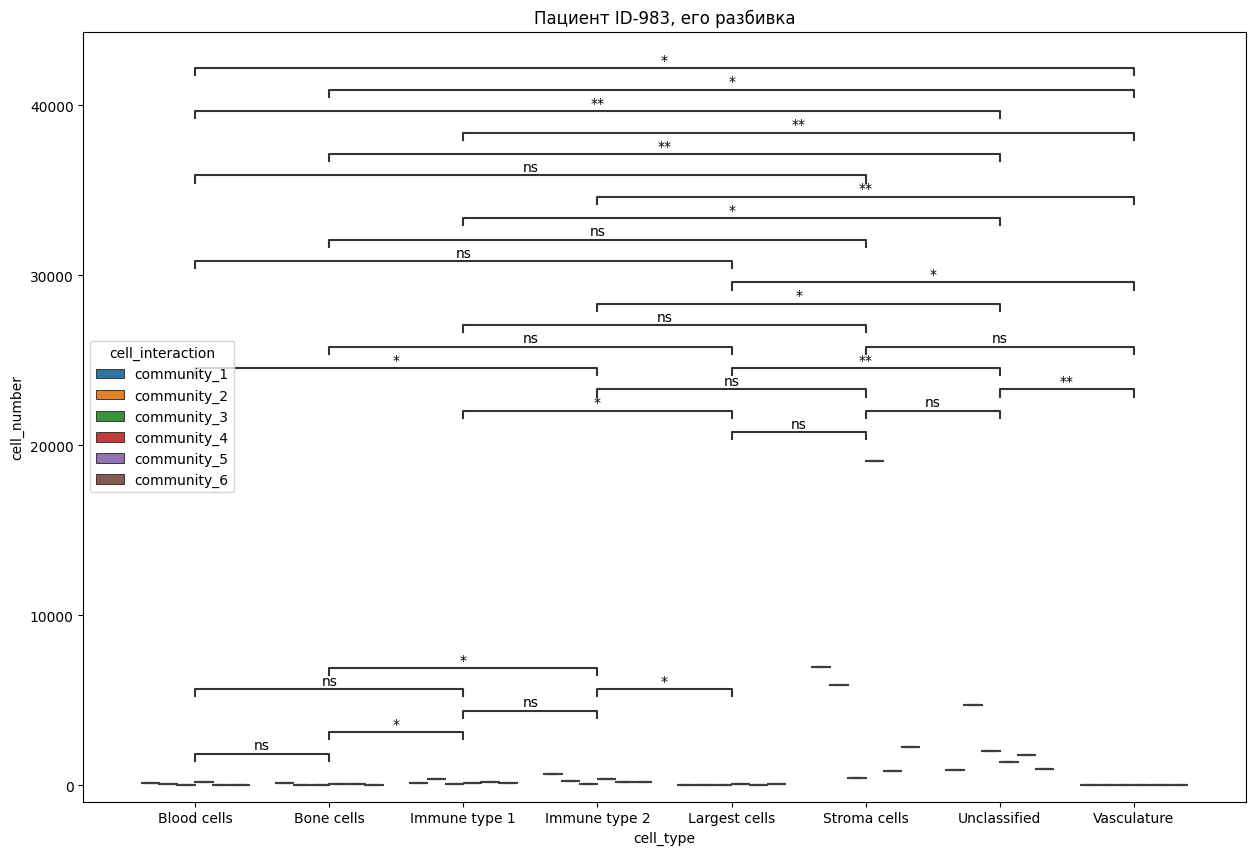

In [305]:
community_melt_id983 = community_melt[
    community_melt['case_id'] == 983
]

plt.figure(figsize=(15,10))
plt.title("Пациент ID-983, его разбивка")
ax = sns.boxplot(
    data=community_melt_id983, x='cell_type', y ='cell_number', hue='cell_interaction'
)

x = 'cell_type'
y = 'cell_number'
order = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]
pairs=list(combinations(order, 2))

annotator = Annotator(ax, pairs, data=community_melt_id983, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

In [306]:
df['case_id'].unique()

array([891, 199,  40, 559, 566, 693, 708, 983], dtype=int64)

In [307]:
community_melt_Blood = community_melt[
    community_melt['cell_type'] == "Blood cells"
]
community_melt_Blood_id = pandasql.sqldf("""
    SELECT *
    FROM community_melt_Blood
    GROUP BY case_id, cell_interaction;"""
    )
community_melt_Blood_id.head()

,cell_interaction,case_id,cell_type,cell_number
0,community_1,40,Blood cells,37.0
1,community_2,40,Blood cells,40.0
2,community_3,40,Blood cells,20.0
3,community_4,40,Blood cells,18.0
4,community_5,40,Blood cells,77.0


Подобные сравнения ниже тоже интересно проводить, но они непоказательны, т.к. пациенты разные.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

708 vs. 891: t-test independent samples, P_val:4.645e-01 t=7.605e-01
891 vs. 983: t-test independent samples, P_val:6.915e-02 t=-2.036e+00
40 vs. 199: t-test independent samples, P_val:5.185e-02 t=-2.207e+00
199 vs. 559: t-test independent samples, P_val:1.013e-02 t=3.162e+00
559 vs. 566: t-test independent samples, P_val:9.507e-02 t=1.843e+00
566 vs. 693: t-test independent samples, P_val:6.043e-02 t=-2.116e+00
693 vs. 708: t-test independent samples, P_val:7.429e-02 t=1.993e+00
693 vs. 891: t-test independent samples, P_val:6.598e-02 t=2.064e+00
199 vs. 566: t-test independent samples, P_val:3.162e-03 t=3.860e+00
40 vs. 559: t-test independent samples, P_val:1.526e-01 t=1.548e+00
559 vs. 693: t-test independent samples, P_val:7.488e-02 t=-1.988e+00
566 vs. 708: t-test independent samples, P_val:2.015e-01 t

(<AxesSubplot: title={'center': 'Количество клеток крови у пациентов в разрезе окружения'}, xlabel='case_id', ylabel='cell_number'>,
  <statannotations.Annotation.Annotation at 0x1f6937232e0>])

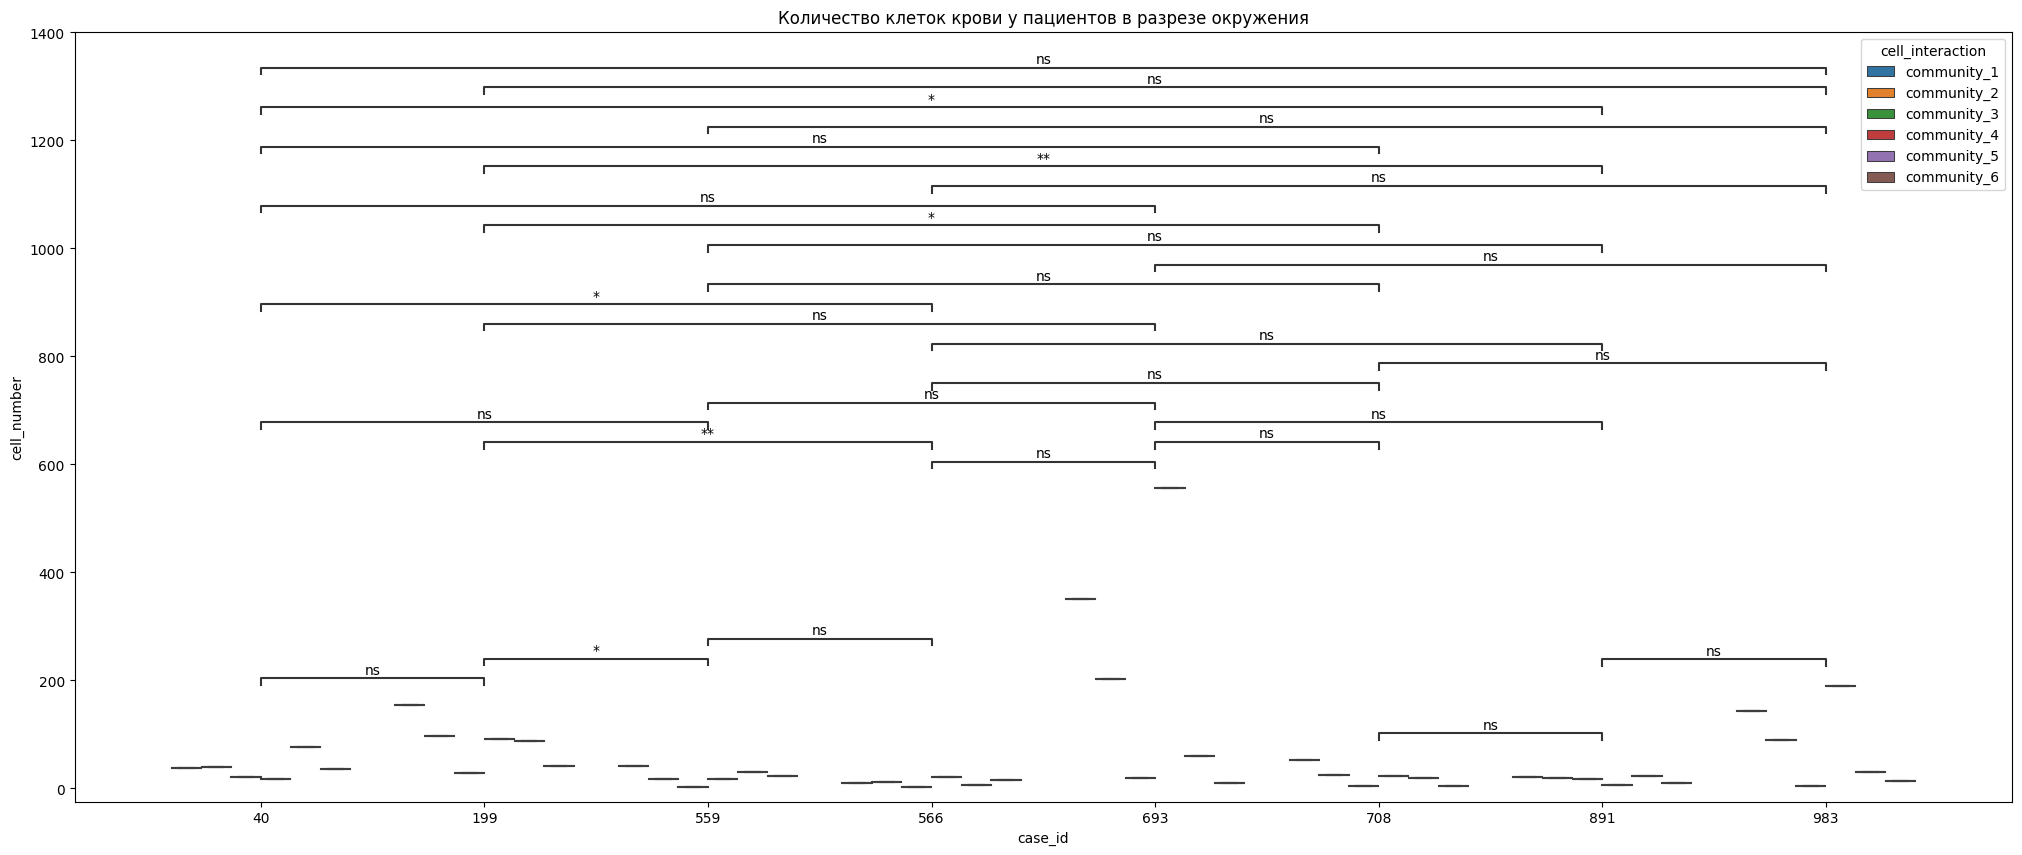

In [468]:
plt.figure(figsize=(25,10))
plt.title("Количество клеток крови у пациентов в разрезе окружения")
ax = sns.boxplot(data=community_melt_Blood_id, x='case_id', y ='cell_number', hue='cell_interaction')

x = 'case_id'
y = 'cell_number'
order = [891, 199,  40, 559, 566, 693, 708, 983]
pairs=list(combinations(order, 2))
annotator = Annotator(ax, pairs, data=community_melt_Blood_id, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

    3 Вопрос.  Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,

по Оу — их доля в ткани пациента.

Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [311]:
df['index'] = range(df.shape[0])

In [557]:
df.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,index
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,0
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,1
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,2
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,3
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,4


In [558]:
community_cell_count = pd.pivot_table(df, 
                index=['cell_interaction', 'case_id','age_group'],
                columns='cell_type',
                values='index',
                aggfunc=len
                ).fillna(0).reset_index()

community_cell_count.head()

cell_type,cell_interaction,case_id,age_group,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,community_1,40,elder_group,37.0,27.0,27.0,1343.0,67.0,5522.0,396.0,2.0
1,community_1,199,young_group,155.0,37.0,39.0,898.0,48.0,6490.0,651.0,0.0
2,community_1,559,elder_group,42.0,29.0,11.0,56.0,11.0,1401.0,117.0,3.0
3,community_1,566,elder_group,9.0,15.0,4.0,187.0,11.0,975.0,85.0,1.0
4,community_1,693,young_group,351.0,799.0,306.0,1025.0,103.0,9576.0,1350.0,3.0


In [559]:
community_cell_count.sum(axis=1)

C:\Users\rinen\AppData\Local\Temp\ipykernel_17740\3038541443.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0      7461.0
1      8517.0
2      2229.0
3      1853.0
4     14206.0
5      6937.0
6      1935.0
7     10017.0
8      7774.0
9     10729.0
10     1948.0
11     2853.0
12    12742.0
13     5223.0
14     2510.0
15    12342.0
16     8292.0
17     5792.0
18     1891.0
19     1970.0
20     2666.0
21     3963.0
22     3156.0
23     3596.0
24     3709.0
25     7825.0
26     1506.0
27     4150.0
28    39550.0
29     4963.0
30     1610.0
31    22295.0
32    13704.0
33     7273.0
34     2016.0
35     1457.0
36     3624.0
37     4840.0
38     2508.0
39     4098.0
40     9362.0
41     4848.0
42     1687.0
43     4845.0
44     1599.0
45     2087.0
46     2452.0
47     4666.0
dtype: float64

In [560]:
cell_types = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]

In [561]:
community_cell_count[cell_types] = community_cell_count[
       cell_types
].div(community_cell_count.sum(axis=1), axis=0)

C:\Users\rinen\AppData\Local\Temp\ipykernel_17740\4022970578.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [562]:
community_cell_count.head()

cell_type,cell_interaction,case_id,age_group,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,community_1,40,elder_group,0.004959,0.003619,0.003619,0.180003,0.008980,0.740115,0.053076,0.000268
1,community_1,199,young_group,0.018199,0.004344,0.004579,0.105436,0.005636,0.762005,0.076435,0.000000
2,community_1,559,elder_group,0.018843,0.013010,0.004935,0.025123,0.004935,0.628533,0.052490,0.001346
3,community_1,566,elder_group,0.004857,0.008095,0.002159,0.100917,0.005936,0.526174,0.045872,0.000540
4,community_1,693,young_group,0.024708,0.056244,0.021540,0.072153,0.007250,0.674081,0.095030,0.000211


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_2_elder_group vs. community_2_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=7.000e+00
community_1_elder_group vs. community_1_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=3.000e+00
community_3_elder_group vs. community_3_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01
community_4_elder_group vs. community_4_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:4.857e-01 U_stat=5.000e+00
community_5_elder_group vs. community_5_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=9.000e+00
community_6_elder_group vs. community_6_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:4.857e-01 U_stat=1.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <

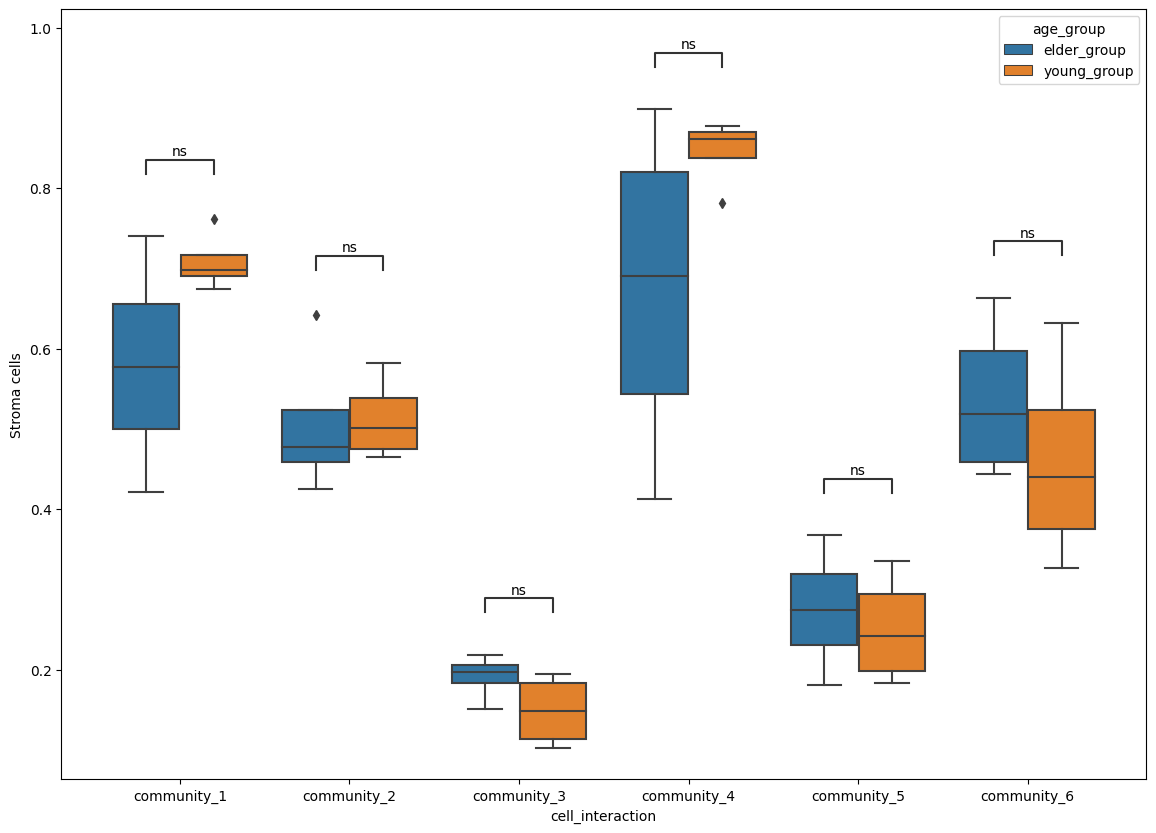

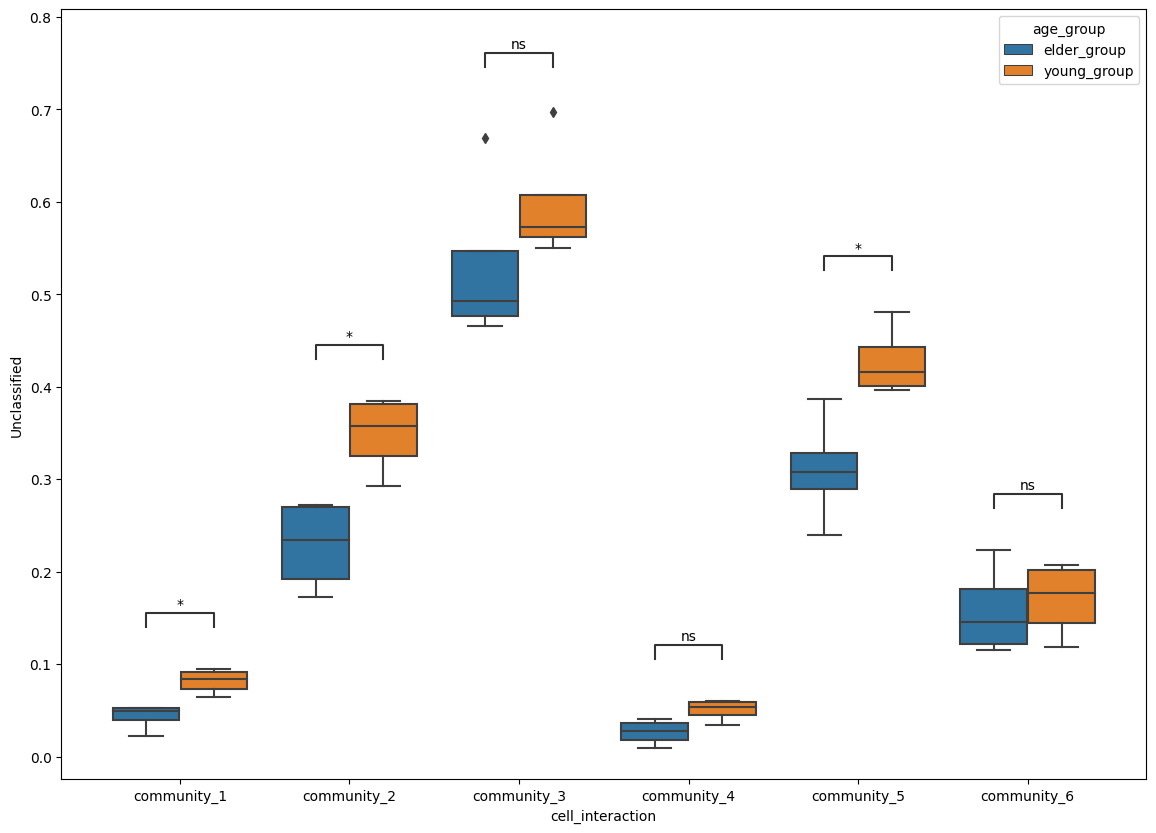

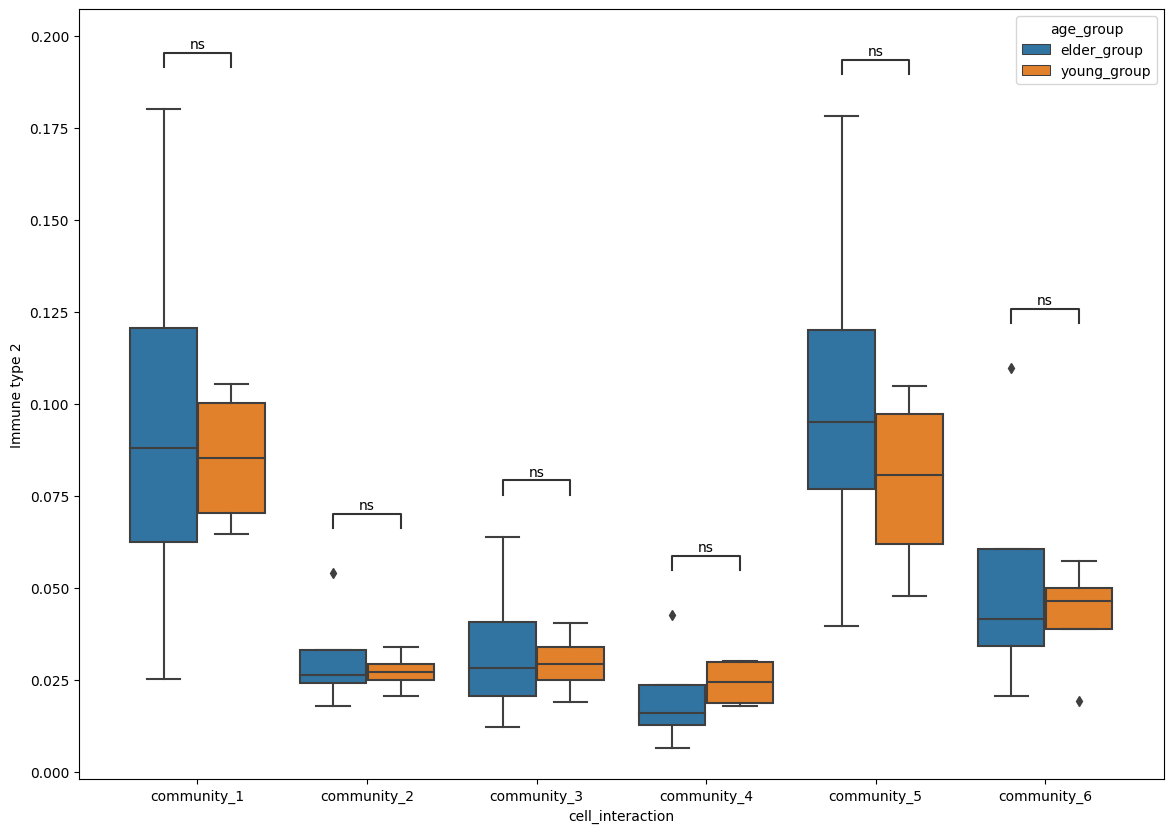

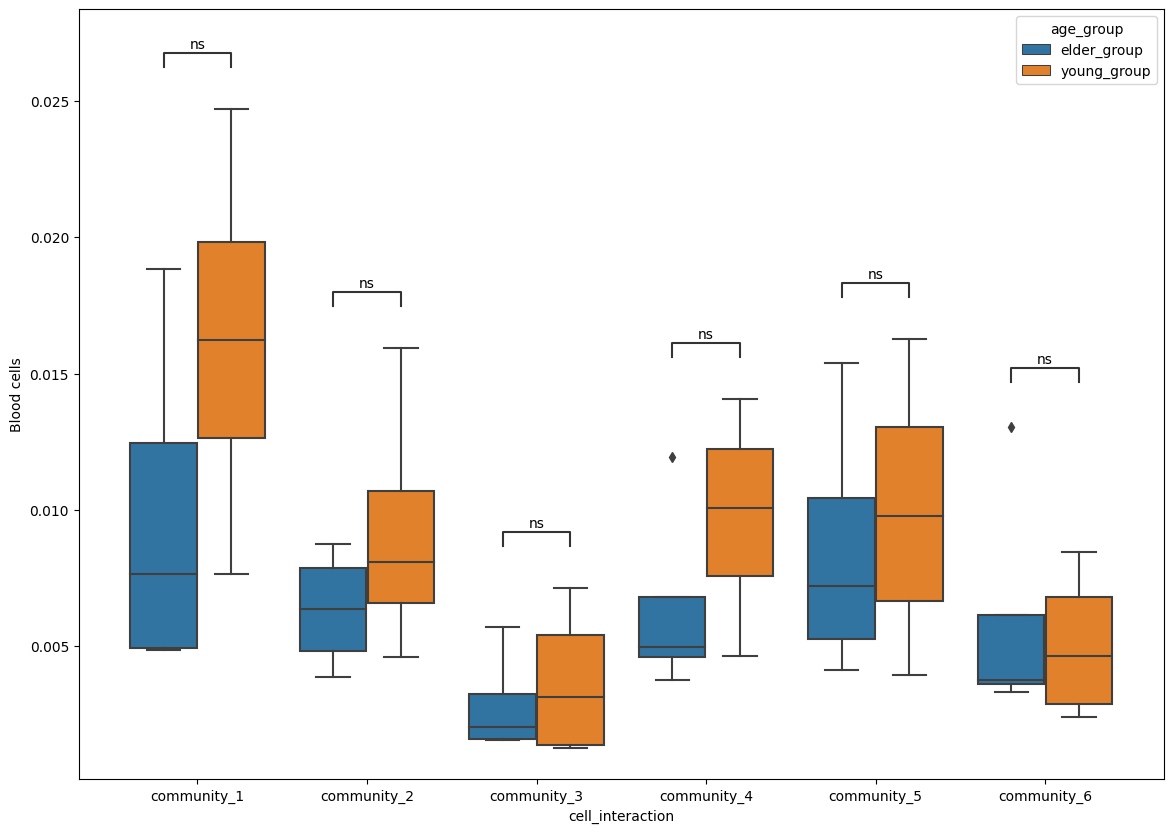

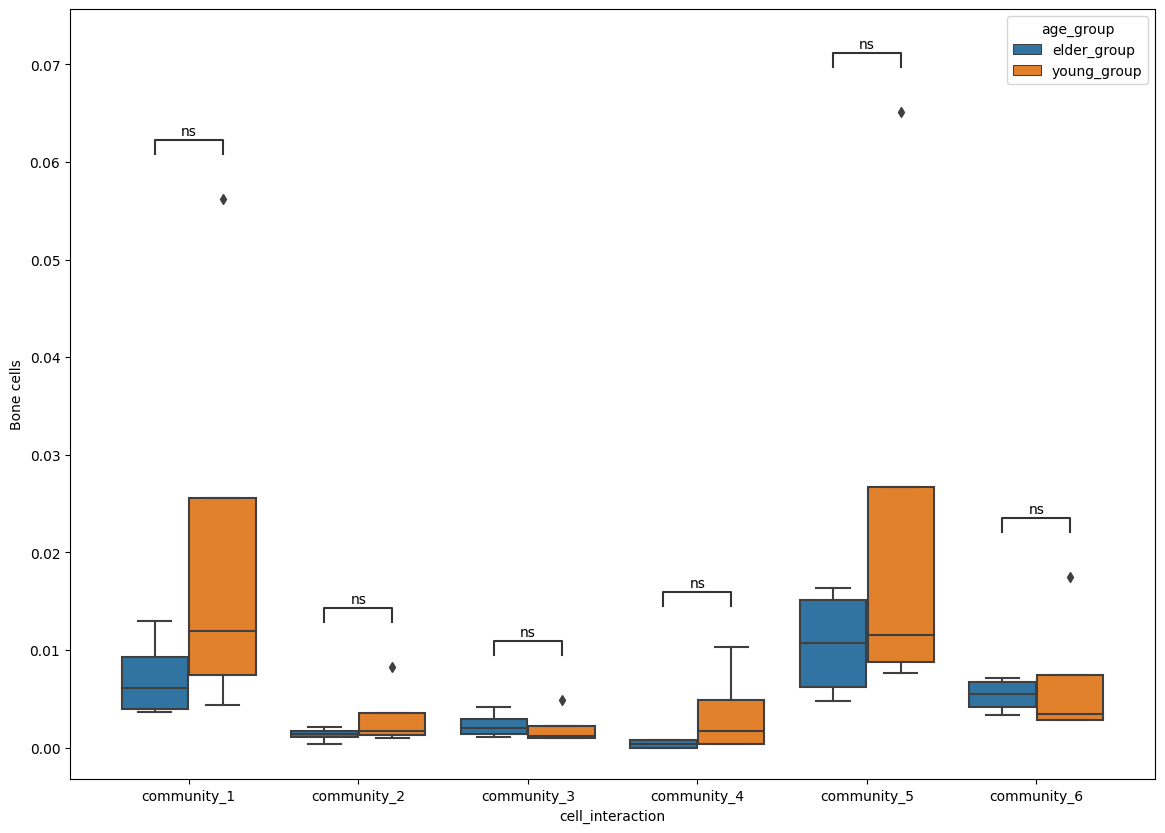

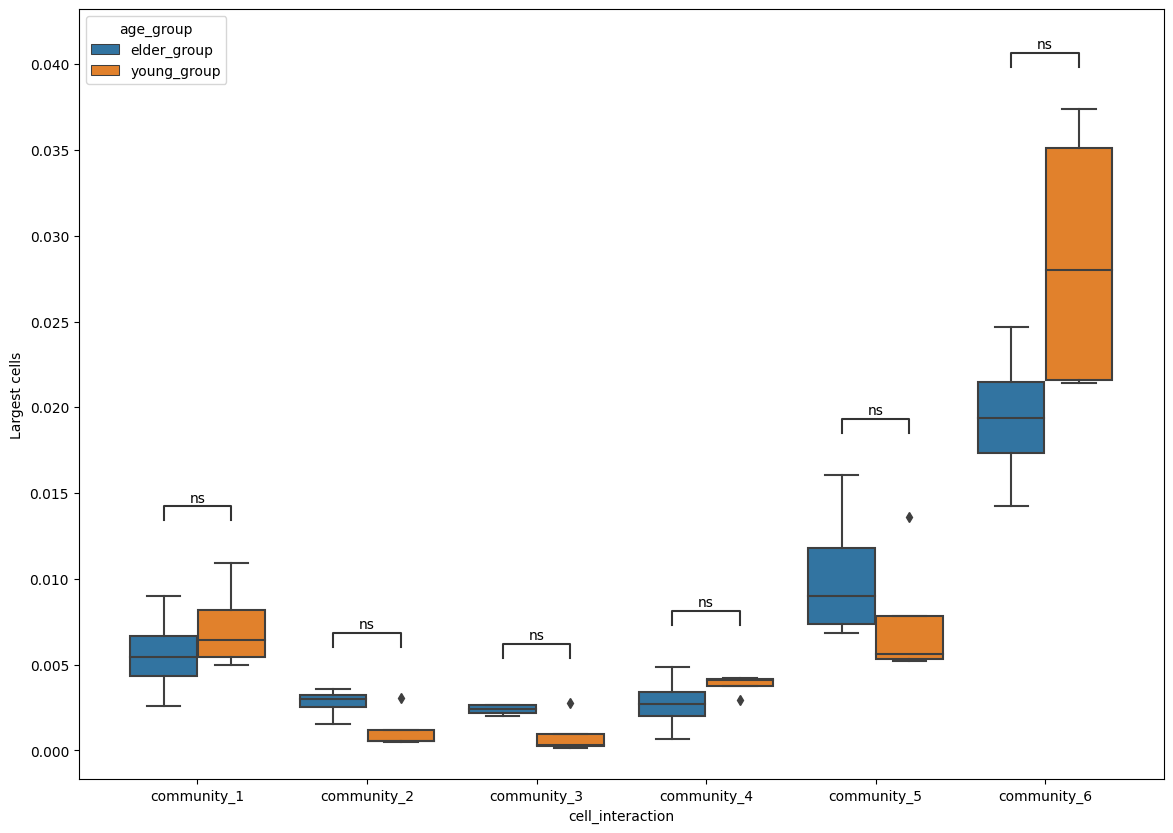

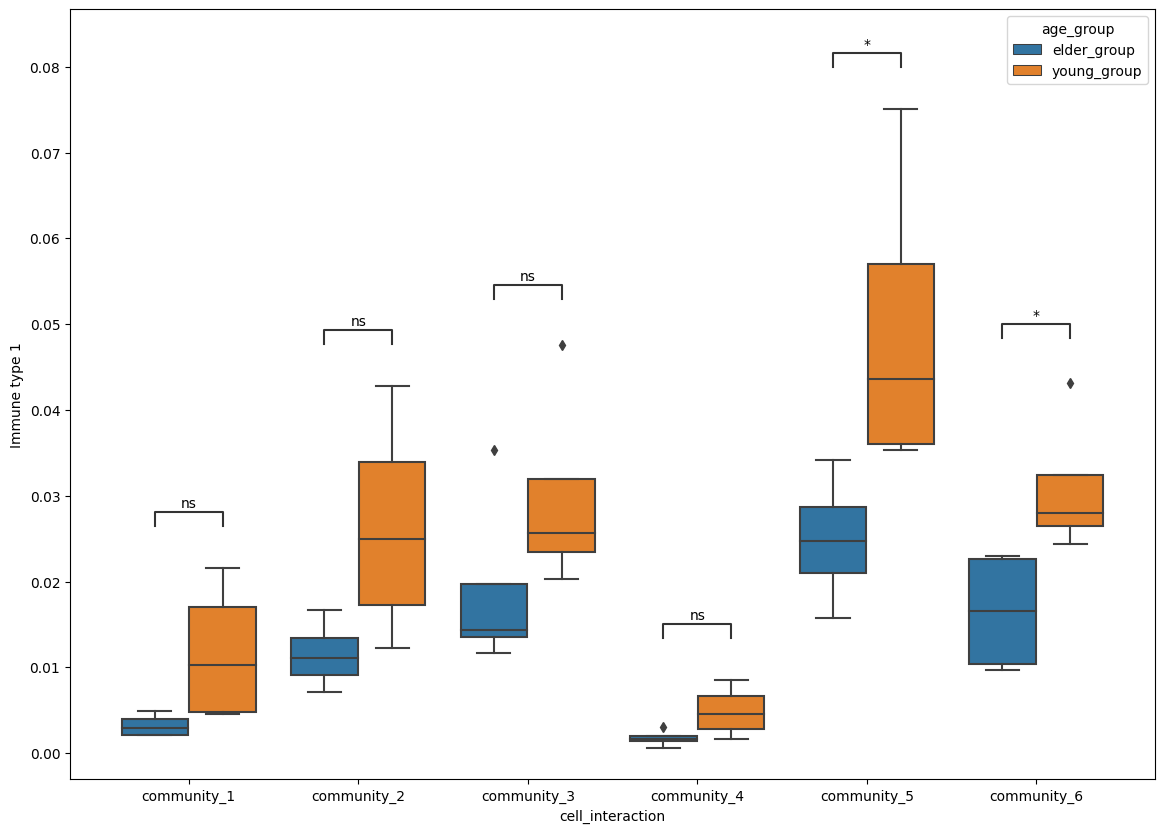

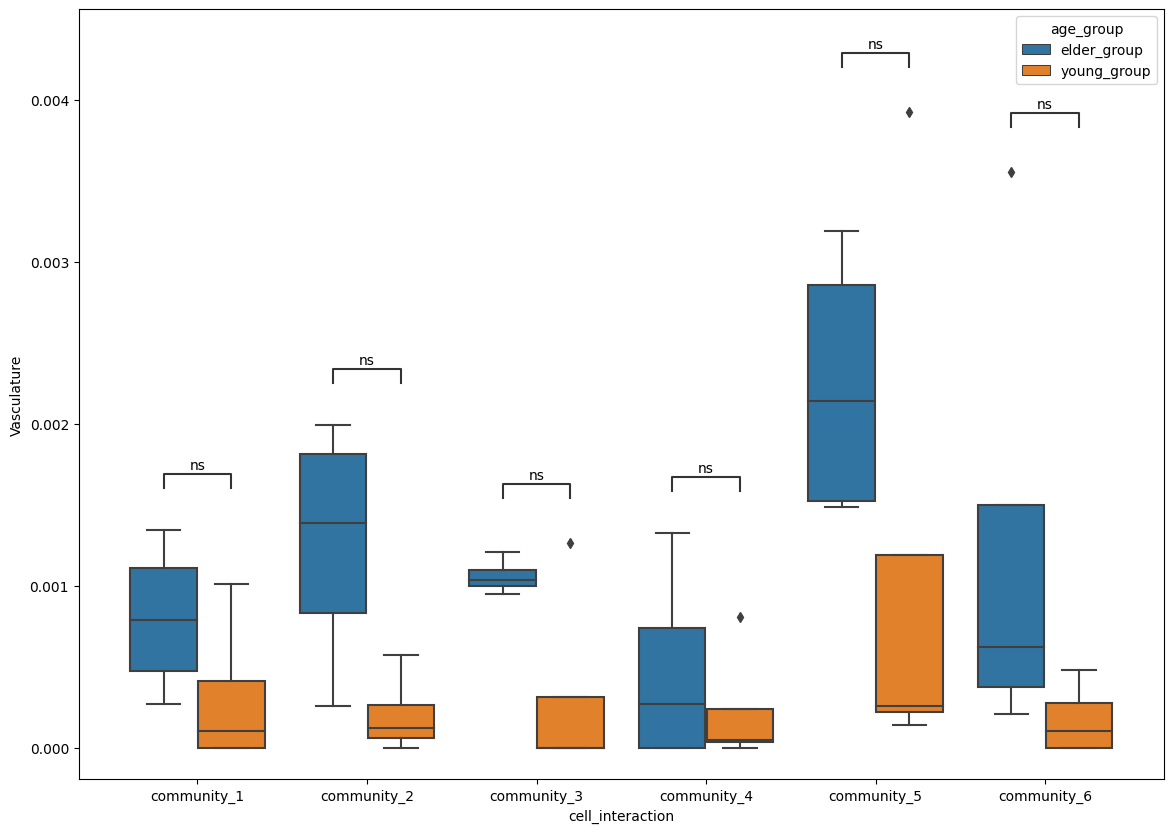

Executing shutdown due to inactivity...


2023-01-05 22:08:03,476 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2023-01-05 22:08:07,586 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", lin

2023-01-05 22:08:07,586 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\rinen\AppData\Local\Programs\Python\Python39

In [622]:
for i in df['cell_type'].unique():
    x='cell_interaction'
    y = i
    hue = 'age_group'

    hue_order=['elder_group','young_group']
    pairs = [((i, 'elder_group'), (i, 'young_group'))
        for i in community_cell_count['cell_interaction'].unique()
    ]


    plt.figure(figsize=(14,10))
    ax = sns.boxplot(
    data=community_cell_count, x='cell_interaction',
    y = y, hue=hue, hue_order=hue_order
    )

    annotator = Annotator(ax, pairs, data=community_cell_count, x=x, y=y,hue_order=hue_order, hue=hue)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

    4 Вопрос. Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

Если я правильно понял задачу то выборка будет только из молодых пациентов. Делим эту выборку на две: молодые с иуммными клетками молодые с стромальными клетками и сравниваем их расстояния.

In [833]:
young_immun = pandasql.sqldf("""
    SELECT 
        age_group,
        cell_type,
        distance_to_vasculature,
        distance_to_largest_cell
    FROM df
    WHERE (cell_type = 'Immune type 2'
        OR cell_type = 'Immune type 1')
        AND age_group = 'young_group'
    ORDER BY  cell_type;""")

In [838]:
young_stroma = pandasql.sqldf("""
    SELECT 
        age_group,
        cell_type,
        distance_to_vasculature,
        distance_to_largest_cell
    FROM df
    WHERE cell_type = 'Stroma cells'
        AND age_group = 'young_group'
    ORDER BY  cell_type;""")

In [840]:
test = [i for i in young_immun['distance_to_vasculature']]
control = [i for i in young_stroma['distance_to_vasculature']]

In [841]:
np.random.shuffle(test)
np.random.shuffle(control)

In [842]:
len(test), np.sum(test)

(12639, 12047012.929208785)

In [843]:
len(control), np.sum(control)

(127408, 124562141.27052425)

In [844]:
def my_func(sample1, sample2):
    mean1 = np.sum(sample1) / len(sample1)
    mean2 = np.sum(sample2) / len(sample2)

    ME = mean1 - mean2
    return ME * 100

In [846]:
results = []
for i in range(10_000):
    sample1 = np.random.choice(control, young_stroma.shape[0], replace=True)
    sample2 = np.random.choice(test, young_immun.shape[0], replace=True)
    results.append(my_func(sample1, sample2))

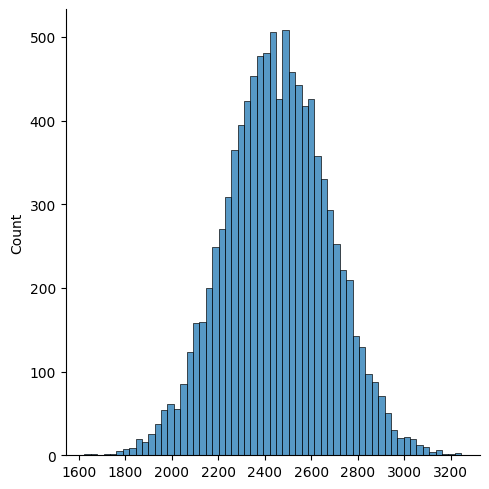

In [847]:
sns.displot(results);

In [848]:
np.std(results)

222.09648070079157

In [849]:
np.quantile(results, 0.025), np.percentile(results, 2.5)

(2013.8552153656533, 2013.8552153656533)

In [850]:
np.quantile(results, 0.975), np.percentile(results, 97.5)

(2889.4456388125323, 2889.4456388125323)

In [851]:
#Bootstrap для расстояния до сосудистых клеток у молодых
#между имунными и стромальными клетками
(2013.8552153656533, 2889.4456388125323)

(2013.8552153656533, 2889.4456388125323)

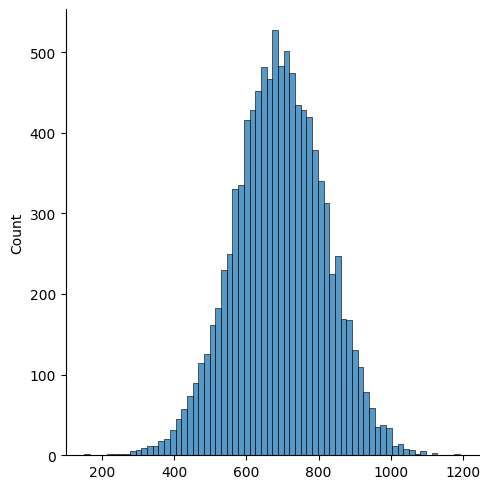

In [854]:
test = [i for i in young_immun['distance_to_largest_cell']]
control = [i for i in young_stroma['distance_to_largest_cell']]

def my_func(sample1, sample2):
    mean1 = np.sum(sample1) / len(sample1)
    mean2 = np.sum(sample2) / len(sample2)

    ME = mean1 - mean2
    return ME * 100

results = []
for i in range(10_000):
    sample1 = np.random.choice(control, young_stroma.shape[0], replace=True)
    sample2 = np.random.choice(test, young_immun.shape[0], replace=True)
    results.append(my_func(sample1, sample2))

sns.displot(results)

In [855]:
np.std(results)

125.55895553492688

In [856]:
np.quantile(results, 0.025), np.percentile(results, 2.5)

(442.7884342777213, 442.7884342777213)

In [857]:
np.quantile(results, 0.975), np.percentile(results, 97.5)

(932.566985137424, 932.566985137424)

In [858]:
#Bootstrap для расстояния до Больших клеток
(442.7884342777213, 932.566985137424)

(442.7884342777213, 932.566985137424)

Да, все верно: Имунные клетки распологаються ближе к сосудам и больших клеткам, чем Мезенхимальные.

    5 Вопрос. Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом. В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html